## Загрузим нужные библиотеки

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [5]:
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torchvision import datasets, models, transforms
from torchvision.models import resnet18

import numpy as np

import json
import random

import torch.nn.functional as F
import random

from sklearn.metrics import recall_score, precision_score

from tqdm import tqdm
from tqdm.auto import tqdm as tqdm_
from tqdm.notebook import tqdm as tqdm_step

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

import json
import os

In [6]:
df = pd.read_csv("train_dataset_train.csv")

## Рассмотрим датасет по ближе

In [7]:
df.head(3)

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,...,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,crop
0,3536,20,0.072846,0.261778,0.062981,0.104442,0.021096,0.052202,0.158723,0.000000,...,0.108999,0.118854,0.000000,0.000000,0.026784,0.126832,0.614770,0.008857,0.081498,3
1,3739,45,0.332928,0.287182,0.097138,0.152467,0.075484,0.000000,0.140326,0.163340,...,0.134469,0.208268,0.000000,0.000000,0.111148,0.174914,0.179612,0.113071,0.046997,4
2,1294,28,0.013679,0.007055,0.120804,0.037839,0.259125,0.000000,0.037446,0.506516,...,0.084467,0.000000,0.210496,0.130467,0.155225,0.090607,0.054127,0.007437,0.219614,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4830 entries, 0 to 4829
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4830 non-null   int64  
 1   area                4830 non-null   int64  
 2   nd_mean_2021-04-16  4830 non-null   float64
 3   nd_mean_2021-04-19  4830 non-null   float64
 4   nd_mean_2021-04-22  4830 non-null   float64
 5   nd_mean_2021-04-26  4830 non-null   float64
 6   nd_mean_2021-04-28  4830 non-null   float64
 7   nd_mean_2021-05-02  4830 non-null   float64
 8   nd_mean_2021-05-04  4830 non-null   float64
 9   nd_mean_2021-05-07  4830 non-null   float64
 10  nd_mean_2021-05-16  4830 non-null   float64
 11  nd_mean_2021-05-17  4830 non-null   float64
 12  nd_mean_2021-05-21  4830 non-null   float64
 13  nd_mean_2021-05-26  4830 non-null   float64
 14  nd_mean_2021-05-27  4830 non-null   float64
 15  nd_mean_2021-05-29  4830 non-null   float64
 16  nd_mea

Рассмотрим единственный не числовой столбец

In [9]:
arr_cols = [col for col in df.columns if 'nd_mean' in col]
arr_cols.sort()
arr_cols

['nd_mean_2021-04-15',
 'nd_mean_2021-04-16',
 'nd_mean_2021-04-18',
 'nd_mean_2021-04-19',
 'nd_mean_2021-04-20',
 'nd_mean_2021-04-22',
 'nd_mean_2021-04-23',
 'nd_mean_2021-04-25',
 'nd_mean_2021-04-26',
 'nd_mean_2021-04-27',
 'nd_mean_2021-04-28',
 'nd_mean_2021-04-29',
 'nd_mean_2021-04-30',
 'nd_mean_2021-05-01',
 'nd_mean_2021-05-02',
 'nd_mean_2021-05-03',
 'nd_mean_2021-05-04',
 'nd_mean_2021-05-07',
 'nd_mean_2021-05-08',
 'nd_mean_2021-05-09',
 'nd_mean_2021-05-10',
 'nd_mean_2021-05-15',
 'nd_mean_2021-05-16',
 'nd_mean_2021-05-17',
 'nd_mean_2021-05-19',
 'nd_mean_2021-05-20',
 'nd_mean_2021-05-21',
 'nd_mean_2021-05-24',
 'nd_mean_2021-05-26',
 'nd_mean_2021-05-27',
 'nd_mean_2021-05-29',
 'nd_mean_2021-06-02',
 'nd_mean_2021-06-03',
 'nd_mean_2021-06-04',
 'nd_mean_2021-06-05',
 'nd_mean_2021-06-06',
 'nd_mean_2021-06-07',
 'nd_mean_2021-06-09',
 'nd_mean_2021-06-10',
 'nd_mean_2021-06-12',
 'nd_mean_2021-06-13',
 'nd_mean_2021-06-16',
 'nd_mean_2021-06-18',
 'nd_mean_2

In [10]:
arr_cols

['nd_mean_2021-04-15',
 'nd_mean_2021-04-16',
 'nd_mean_2021-04-18',
 'nd_mean_2021-04-19',
 'nd_mean_2021-04-20',
 'nd_mean_2021-04-22',
 'nd_mean_2021-04-23',
 'nd_mean_2021-04-25',
 'nd_mean_2021-04-26',
 'nd_mean_2021-04-27',
 'nd_mean_2021-04-28',
 'nd_mean_2021-04-29',
 'nd_mean_2021-04-30',
 'nd_mean_2021-05-01',
 'nd_mean_2021-05-02',
 'nd_mean_2021-05-03',
 'nd_mean_2021-05-04',
 'nd_mean_2021-05-07',
 'nd_mean_2021-05-08',
 'nd_mean_2021-05-09',
 'nd_mean_2021-05-10',
 'nd_mean_2021-05-15',
 'nd_mean_2021-05-16',
 'nd_mean_2021-05-17',
 'nd_mean_2021-05-19',
 'nd_mean_2021-05-20',
 'nd_mean_2021-05-21',
 'nd_mean_2021-05-24',
 'nd_mean_2021-05-26',
 'nd_mean_2021-05-27',
 'nd_mean_2021-05-29',
 'nd_mean_2021-06-02',
 'nd_mean_2021-06-03',
 'nd_mean_2021-06-04',
 'nd_mean_2021-06-05',
 'nd_mean_2021-06-06',
 'nd_mean_2021-06-07',
 'nd_mean_2021-06-09',
 'nd_mean_2021-06-10',
 'nd_mean_2021-06-12',
 'nd_mean_2021-06-13',
 'nd_mean_2021-06-16',
 'nd_mean_2021-06-18',
 'nd_mean_2

In [11]:
group_cols = {}
for col in arr_cols:
    val = col.split('-')[-2]
    if val in group_cols.keys():
        group_cols[val].append(col)
    else:
        group_cols[val] = [col]

In [12]:
group_cols.keys()

dict_keys(['04', '05', '06', '07', '08'])

In [13]:
arr_cols

['nd_mean_2021-04-15',
 'nd_mean_2021-04-16',
 'nd_mean_2021-04-18',
 'nd_mean_2021-04-19',
 'nd_mean_2021-04-20',
 'nd_mean_2021-04-22',
 'nd_mean_2021-04-23',
 'nd_mean_2021-04-25',
 'nd_mean_2021-04-26',
 'nd_mean_2021-04-27',
 'nd_mean_2021-04-28',
 'nd_mean_2021-04-29',
 'nd_mean_2021-04-30',
 'nd_mean_2021-05-01',
 'nd_mean_2021-05-02',
 'nd_mean_2021-05-03',
 'nd_mean_2021-05-04',
 'nd_mean_2021-05-07',
 'nd_mean_2021-05-08',
 'nd_mean_2021-05-09',
 'nd_mean_2021-05-10',
 'nd_mean_2021-05-15',
 'nd_mean_2021-05-16',
 'nd_mean_2021-05-17',
 'nd_mean_2021-05-19',
 'nd_mean_2021-05-20',
 'nd_mean_2021-05-21',
 'nd_mean_2021-05-24',
 'nd_mean_2021-05-26',
 'nd_mean_2021-05-27',
 'nd_mean_2021-05-29',
 'nd_mean_2021-06-02',
 'nd_mean_2021-06-03',
 'nd_mean_2021-06-04',
 'nd_mean_2021-06-05',
 'nd_mean_2021-06-06',
 'nd_mean_2021-06-07',
 'nd_mean_2021-06-09',
 'nd_mean_2021-06-10',
 'nd_mean_2021-06-12',
 'nd_mean_2021-06-13',
 'nd_mean_2021-06-16',
 'nd_mean_2021-06-18',
 'nd_mean_2

In [14]:
calc = {}
data_arr = df[arr_cols].to_numpy()

df['sum_nd_global_mean'] = np.sum(data_arr, axis=1)

In [15]:
df['sum_nd_global_max'] = np.max(data_arr, axis=1)
df['sum_nd_global_min'] = np.min(data_arr, axis=1)
df['sum_nd_global_mean'] = np.mean(data_arr, axis=1)
df['sum_nd_global_median'] = np.median(data_arr, axis=1)
df['sum_nd_global_std'] = np.std(data_arr, axis=1)
df['sum_nd_global_argmax'] = np.argmax(data_arr, axis=1)
df['sum_nd_global_argmin'] = np.argmin(data_arr, axis=1)

In [16]:
for k in group_cols.keys():
    data_k_arr = df[group_cols[k]].to_numpy()
    df[f'sum_nd_{k}_mean'] = np.sum(data_k_arr, axis=1)
    df[f'sum_nd_{k}_max'] = np.max(data_k_arr, axis=1)
    df[f'sum_nd_{k}_min'] = np.min(data_k_arr, axis=1)
    df[f'sum_nd_{k}_mean'] = np.mean(data_k_arr, axis=1)
    df[f'sum_nd_{k}_median'] = np.median(data_k_arr, axis=1)
    df[f'sum_nd_{k}_std'] = np.std(data_k_arr, axis=1)
    df[f'sum_nd_{k}_argmax'] = np.argmax(data_k_arr, axis=1)
    df[f'sum_nd_{k}_argmin'] = np.argmin(data_k_arr, axis=1)

In [17]:
len(df.columns)

116

In [18]:
df.describe()

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,...,sum_nd_07_std,sum_nd_07_argmax,sum_nd_07_argmin,sum_nd_08_mean,sum_nd_08_max,sum_nd_08_min,sum_nd_08_median,sum_nd_08_std,sum_nd_08_argmax,sum_nd_08_argmin
count,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,...,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000
mean,3473.406211,53.871429,0.149911,0.118843,0.158939,0.166146,0.125002,0.162440,0.092302,0.108834,...,0.269944,3.827329,4.143271,0.232430,0.584272,0.009173,0.169965,0.214995,2.131263,3.304141
std,1984.993812,34.191660,0.112598,0.103192,0.136001,0.123605,0.117605,0.145027,0.095207,0.120939,...,0.045399,2.719890,4.309108,0.086175,0.152622,0.020299,0.125417,0.066555,2.039919,2.255580
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.105258,0.000000,0.000000,0.017558,0.064747,0.000000,0.000000,0.020018,0.000000,0.000000
25%,1772.500000,26.000000,0.047477,0.025280,0.050124,0.053859,0.027609,0.040885,0.012844,0.014682,...,0.239891,2.000000,0.000000,0.168322,0.491633,0.000000,0.087711,0.169496,0.000000,1.000000
50%,3489.500000,45.000000,0.142240,0.097346,0.129819,0.155571,0.096516,0.121307,0.069936,0.077155,...,0.271359,3.000000,1.000000,0.230354,0.605010,0.000000,0.133629,0.218437,1.000000,3.000000
75%,5191.750000,76.000000,0.245596,0.202955,0.241323,0.269131,0.192070,0.277772,0.143207,0.162079,...,0.301618,4.000000,8.000000,0.292232,0.698825,0.007743,0.204099,0.263411,4.000000,5.000000
max,6900.000000,140.000000,0.987671,0.760245,0.764437,0.983779,0.668150,0.970286,0.779277,0.782066,...,0.403435,12.000000,12.000000,0.541592,0.942515,0.171648,0.771215,0.405411,7.000000,7.000000


In [19]:
df.select_dtypes(include=['object'])

,.geo
0,"{""type"":""Polygon"",""coordinates"":[[[42.49107269..."
1,"{""type"":""Polygon"",""coordinates"":[[[50.25545110..."
2,"{""type"":""Polygon"",""coordinates"":[[[37.99698998..."
3,"{""type"":""Polygon"",""coordinates"":[[[44.72154181..."
4,"{""type"":""Polygon"",""coordinates"":[[[34.77829934..."
...,...
4825,"{""type"":""Polygon"",""coordinates"":[[[40.90052911..."
4826,"{""type"":""Polygon"",""coordinates"":[[[40.00883381..."
4827,"{""type"":""Polygon"",""coordinates"":[[[38.57789936..."
4828,"{""type"":""Polygon"",""coordinates"":[[[53.31082730..."


Это столбец **.geo**

Тепепрь рассмотрим главный столбец с C/Х культурой

<AxesSubplot:>

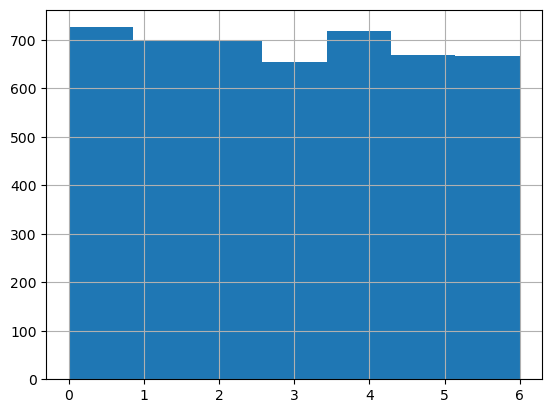

In [20]:
df["crop"].hist(bins = 7)

Заметен слабый разброс популярности категориий

In [21]:
df["crop"].value_counts()

0    726
4    718
1    700
2    697
5    668
6    666
3    655
Name: crop, dtype: int64

Посмотрим на разброс площади полей

<AxesSubplot:xlabel='area', ylabel='count'>

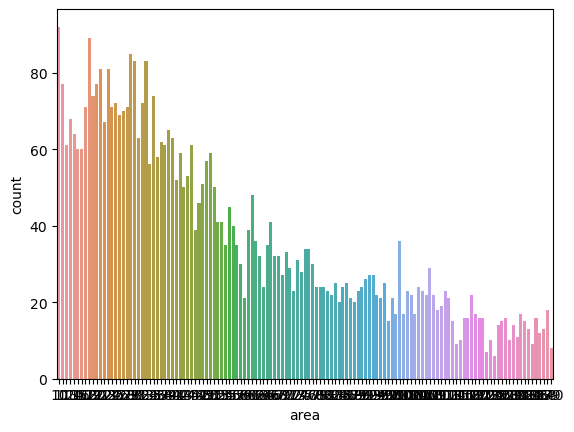

In [22]:
sns.countplot(x = "area" , data  = df)  

Постараемся найти закономерность

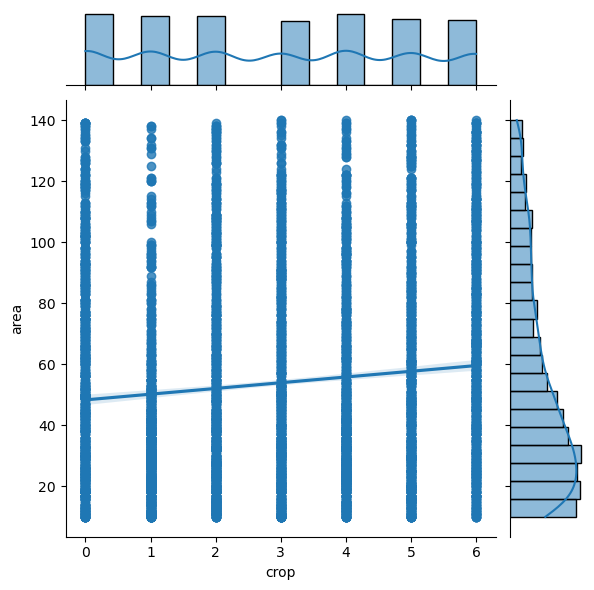

In [23]:
sns.jointplot(x = "crop", y = 'area', data = df, kind = 'reg')

Кажется нет четкой зависимости между категорией культуры и площадью территроии

Последняя попытка найти явную зависимость в данных

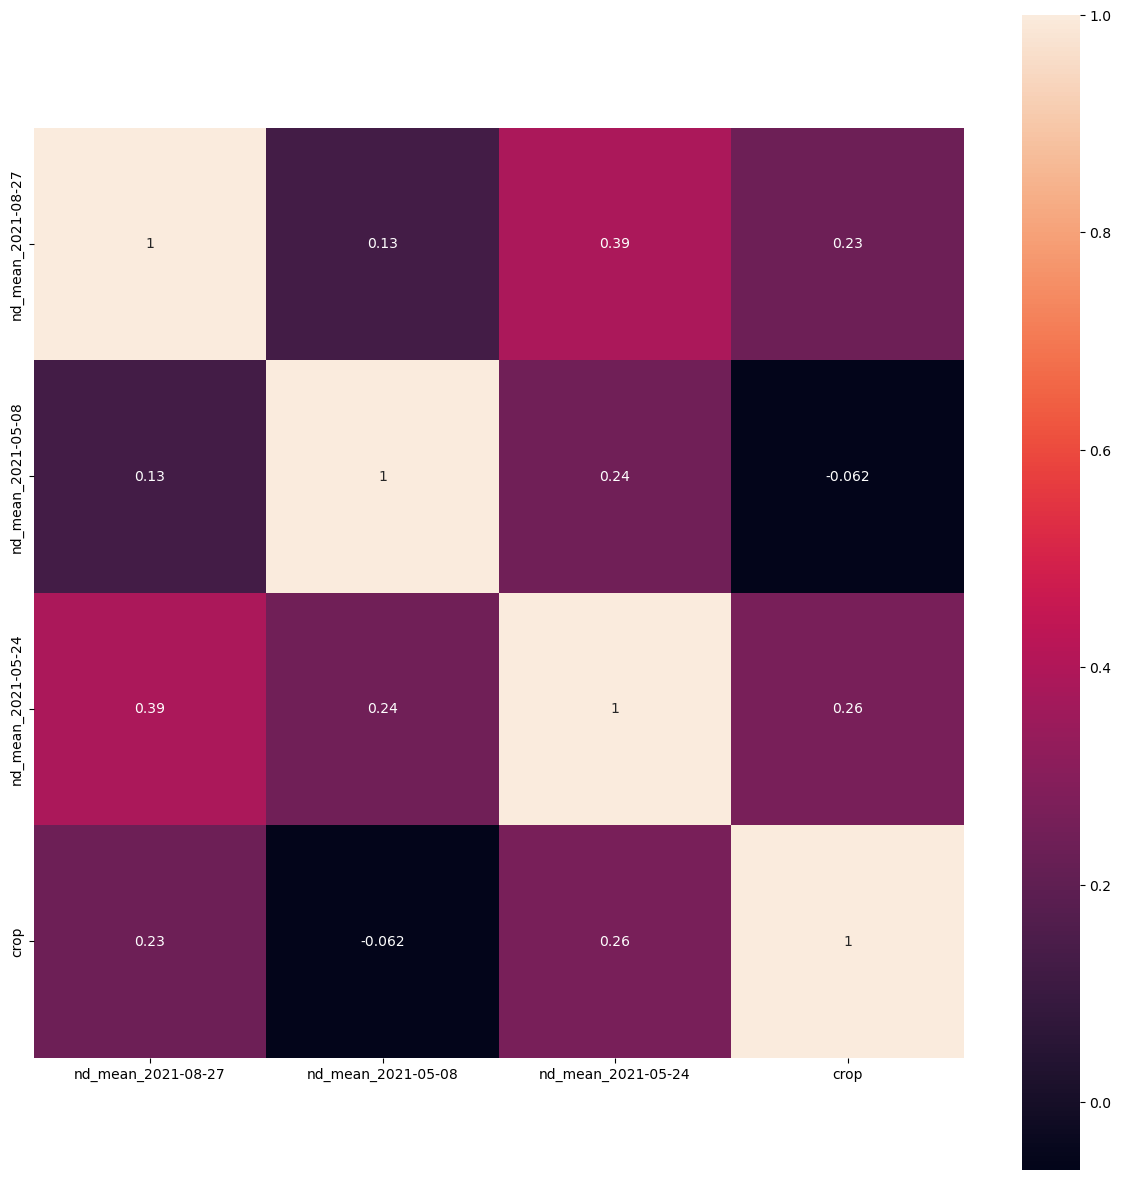

In [24]:
plt.rcParams['figure.figsize']=(15,15)

corr = df.loc[:, "nd_mean_2021-08-27":"crop"].corr()
g = sns.heatmap(corr, square = True, annot=True)

## Выделим выборки

In [25]:
x_min = []
x_max = []
x_mean = []
x_mediam = []
y_min = []
y_max = []
y_mean = []
y_mediam = []

geo_list = []

for idx in range(len(df[".geo"])):
    row = json.loads(df[".geo"].iloc[idx])
    x = []
    y = []
    
    el = row
    while True:
        if type(el) == type(dict()):
            keys = el.keys()
            for k in keys:
                if k in ['coordinates', 'geometries']:
                    geo_list.append(el[k])
        if type(el) == list and type(el[0]) == type(list()):
            for e in el:
                geo_list.append(e)
        if type(el) == list and type(el[0]) in (int, float) and len(el) == 2:
            x.append(el[0])
            y.append(el[1])
        if type(el) == type(list()) and type(el[0]) == type(dict()):
            for e in el:
                geo_list.append(e)
        if len(geo_list) > 0:
            el = geo_list.pop(-1)
        else:
            break
    
    if len(x) == 0:
        print('--------------------------------------------------------------')
        print(x)
        print('--------------------------------------------------------------')
        print(y)
        print('--------------------------------------------------------------')
        print(row)
    
    x_min.append(np.min(x))
    x_max.append(np.max(x))
    x_mean.append(np.mean(x))
    x_mediam.append(np.median(x))
    y_min.append(np.min(y))
    y_max.append(np.max(y))
    y_mean.append(np.mean(y))
    y_mediam.append(np.median(y))

In [26]:
ty = []
ty_set = set()
ty_ = {}
for idx in range(len(df[".geo"])):
    row = json.loads(df[".geo"].iloc[idx])
    ty.append(row['type'])
    
    if row['type'] not in ty_set:
        ty_set.add(row['type'])
        ty_[row['type']] = row
ty = np.array(ty)
np.unique(ty)

array(['GeometryCollection', 'MultiPolygon', 'Polygon'], dtype='<U18')

In [27]:
df['x_min'] = x_min / np.max(x_min)
df['x_max'] = x_max / np.max(x_max)
df['x_mean'] = x_mean / np.max(x_mean)
df['x_mediam'] = x_mediam / np.max(x_mediam)
df['y_min'] = y_min / np.max(y_min)
df['y_max'] = y_max / np.max(y_max)
df['y_mean'] = y_mean / np.max(y_mean)
df['y_mediam'] = y_mediam / np.max(y_mediam)

In [ ]:
df = df.drop([".geo"], axis = 1)

In [51]:
X = df.drop(["id","crop"], axis = 1)
y = df[["crop"]]

In [52]:
cols = X.columns
cols_set_1 = set()
cols_set_2 = set()
#for col_1 in cols:
#    for col_2 in cols:
#        if col_1 != col_2:
            #if (col_1, col_2) not in cols_set_1 or (col_2, col_1) not in cols_set_1:
            #    X[f'{col_1}_*_{col_2}'] = X[col_1].to_numpy() * X[col_2].to_numpy()
            #    cols_set_1.add((col_1, col_2))
#            if (col_1, col_2) not in cols_set_2 or (col_2, col_1) not in cols_set_2:
#                X[f'{col_1}_+_{col_2}'] = X[col_1].to_numpy() + X[col_2].to_numpy()
#                cols_set_2.add((col_1, col_2))
            #X[f'{col_1}_-_{col_2}'] = X[col_1].to_numpy() - X[col_2].to_numpy()

In [53]:
from sklearn import preprocessing
import numpy as np


for col in X.columns:
    val = preprocessing.normalize([X[col].to_numpy()])
    X[col] = val[0]

In [54]:
X.head()

,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,nd_mean_2021-05-16,...,sum_nd_08_argmax,sum_nd_08_argmin,x_min,x_max,x_mean,x_mediam,y_min,y_max,y_mean,y_mediam
0,0.004510,0.005591,0.023933,0.004332,0.007257,0.001769,0.003450,0.017224,0.000000,0.014972,...,0.000000,0.003597,0.013807,0.013808,0.013807,0.013808,0.013863,0.013862,0.013862,0.013862
1,0.010148,0.025552,0.026256,0.006682,0.010594,0.006329,0.000000,0.015227,0.014446,0.016066,...,0.000000,0.021581,0.016329,0.016330,0.016330,0.016330,0.015262,0.015262,0.015262,0.015262
2,0.006314,0.001050,0.000645,0.008310,0.002629,0.021725,0.000000,0.004063,0.044798,0.000000,...,0.004878,0.000000,0.012346,0.012346,0.012346,0.012347,0.014516,0.014515,0.014516,0.014516
3,0.004285,0.008133,0.004800,0.000132,0.000801,0.003548,0.000000,0.000000,0.003856,0.015782,...,0.014633,0.003597,0.014531,0.014530,0.014531,0.014531,0.015082,0.015081,0.015082,0.015082
4,0.007442,0.010045,0.005805,0.001680,0.000000,0.012632,0.003087,0.027594,0.008975,0.000000,...,0.000000,0.003597,0.011300,0.011300,0.011300,0.011300,0.014265,0.014265,0.014265,0.014265


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [56]:
X_train

,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,nd_mean_2021-05-16,...,sum_nd_08_argmax,sum_nd_08_argmin,x_min,x_max,x_mean,x_mediam,y_min,y_max,y_mean,y_mediam
3158,0.026836,0.004539,0.013303,0.015976,0.001432,0.005178,0.004138,0.004082,0.046168,0.026147,...,0.004878,0.000000,0.011763,0.011774,0.011767,0.011766,0.014345,0.014346,0.014345,0.014345
517,0.019169,0.016866,0.005568,0.002099,0.000501,0.002294,0.002480,0.019266,0.000000,0.008859,...,0.000000,0.007194,0.017819,0.017820,0.017821,0.017822,0.014843,0.014844,0.014844,0.014844
1057,0.004961,0.023353,0.000000,0.017648,0.000721,0.009876,0.003447,0.011963,0.001107,0.014227,...,0.000000,0.017984,0.012158,0.012158,0.012158,0.012158,0.014129,0.014129,0.014129,0.014129
4005,0.023905,0.004431,0.003347,0.010921,0.003230,0.028071,0.023406,0.006129,0.010096,0.016835,...,0.004878,0.010790,0.012591,0.012592,0.012592,0.012592,0.013822,0.013824,0.013823,0.013823
1966,0.013982,0.022522,0.001450,0.002319,0.006575,0.002778,0.014164,0.000000,0.021565,0.018054,...,0.004878,0.021581,0.016627,0.016627,0.016626,0.016626,0.014739,0.014740,0.014740,0.014740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.027062,0.011573,0.012172,0.013256,0.000000,0.013172,0.004351,0.001646,0.017545,0.008446,...,0.000000,0.007194,0.012592,0.012596,0.012593,0.012592,0.014564,0.014565,0.014566,0.014566
466,0.004736,0.011892,0.005334,0.008264,0.022807,0.003062,0.021340,0.022406,0.010386,0.015174,...,0.000000,0.021581,0.012798,0.012797,0.012797,0.012797,0.013838,0.013837,0.013838,0.013838
3092,0.022101,0.002510,0.024081,0.017316,0.016762,0.023081,0.008717,0.009827,0.012550,0.016855,...,0.004878,0.017984,0.013291,0.013294,0.013292,0.013293,0.013904,0.013904,0.013903,0.013903
3772,0.012629,0.020785,0.040080,0.004460,0.020860,0.013160,0.019920,0.013586,0.002127,0.012494,...,0.000000,0.007194,0.012722,0.012720,0.012722,0.012722,0.013996,0.013997,0.013997,0.013997


In [57]:
y_train

,crop
3158,2
517,0
1057,4
4005,4
1966,0
...,...
4426,1
466,0
3092,6
3772,4


In [58]:
df_train = X_train.copy()
df_train['crop'] = y_train

In [59]:
df_train

,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,nd_mean_2021-05-16,...,sum_nd_08_argmin,x_min,x_max,x_mean,x_mediam,y_min,y_max,y_mean,y_mediam,crop
3158,0.026836,0.004539,0.013303,0.015976,0.001432,0.005178,0.004138,0.004082,0.046168,0.026147,...,0.000000,0.011763,0.011774,0.011767,0.011766,0.014345,0.014346,0.014345,0.014345,2
517,0.019169,0.016866,0.005568,0.002099,0.000501,0.002294,0.002480,0.019266,0.000000,0.008859,...,0.007194,0.017819,0.017820,0.017821,0.017822,0.014843,0.014844,0.014844,0.014844,0
1057,0.004961,0.023353,0.000000,0.017648,0.000721,0.009876,0.003447,0.011963,0.001107,0.014227,...,0.017984,0.012158,0.012158,0.012158,0.012158,0.014129,0.014129,0.014129,0.014129,4
4005,0.023905,0.004431,0.003347,0.010921,0.003230,0.028071,0.023406,0.006129,0.010096,0.016835,...,0.010790,0.012591,0.012592,0.012592,0.012592,0.013822,0.013824,0.013823,0.013823,4
1966,0.013982,0.022522,0.001450,0.002319,0.006575,0.002778,0.014164,0.000000,0.021565,0.018054,...,0.021581,0.016627,0.016627,0.016626,0.016626,0.014739,0.014740,0.014740,0.014740,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.027062,0.011573,0.012172,0.013256,0.000000,0.013172,0.004351,0.001646,0.017545,0.008446,...,0.007194,0.012592,0.012596,0.012593,0.012592,0.014564,0.014565,0.014566,0.014566,1
466,0.004736,0.011892,0.005334,0.008264,0.022807,0.003062,0.021340,0.022406,0.010386,0.015174,...,0.021581,0.012798,0.012797,0.012797,0.012797,0.013838,0.013837,0.013838,0.013838,0
3092,0.022101,0.002510,0.024081,0.017316,0.016762,0.023081,0.008717,0.009827,0.012550,0.016855,...,0.017984,0.013291,0.013294,0.013292,0.013293,0.013904,0.013904,0.013903,0.013903,6
3772,0.012629,0.020785,0.040080,0.004460,0.020860,0.013160,0.019920,0.013586,0.002127,0.012494,...,0.007194,0.012722,0.012720,0.012722,0.012722,0.013996,0.013997,0.013997,0.013997,4


In [60]:
df_new_row = []

for crop in np.unique(df_train['crop']):
    df_crop = df_train.loc[df_train['crop'] == crop]
    for idx in range(len(df_crop)):
        select_row = df_crop.iloc[idx]
        for _ in range(5):
            select_row = (select_row + df_crop.iloc[random.randint(0, len(df_crop)-1)])/2

        df_new_row.append(select_row)

df_new_row = pd.concat(df_new_row, axis=1).transpose()     
df_new_row

,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,nd_mean_2021-05-16,...,sum_nd_08_argmin,x_min,x_max,x_mean,x_mediam,y_min,y_max,y_mean,y_mediam,crop
0,0.019409,0.021198,0.008127,0.007262,0.014194,0.004654,0.012091,0.013507,0.011696,0.015167,...,0.016635,0.013775,0.013777,0.013776,0.013775,0.014147,0.014148,0.014148,0.014148,0.0
1,0.007012,0.012481,0.008687,0.012285,0.017541,0.011469,0.024849,0.008565,0.005853,0.016643,...,0.015623,0.013669,0.013669,0.013669,0.013669,0.013884,0.013884,0.013884,0.013884,0.0
2,0.005631,0.014028,0.004157,0.021836,0.009992,0.007266,0.020941,0.003242,0.010932,0.015412,...,0.007081,0.012884,0.012882,0.012883,0.012883,0.014008,0.014008,0.014008,0.014008,0.0
3,0.014052,0.020512,0.008878,0.014309,0.014225,0.016993,0.013728,0.008294,0.001199,0.012130,...,0.013151,0.014639,0.014638,0.014638,0.014638,0.014153,0.014153,0.014153,0.014153,0.0
4,0.017485,0.019251,0.003562,0.007385,0.017560,0.013575,0.007991,0.016521,0.015873,0.013254,...,0.005620,0.013820,0.013822,0.013821,0.013821,0.014257,0.014258,0.014257,0.014258,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4100,0.020867,0.005885,0.011025,0.010064,0.017833,0.017659,0.013215,0.014584,0.010031,0.013384,...,0.010341,0.014060,0.014061,0.014061,0.014061,0.013910,0.013911,0.013910,0.013910,6.0
4101,0.010324,0.011306,0.021320,0.015214,0.015652,0.003318,0.013373,0.004262,0.014869,0.016092,...,0.011690,0.015908,0.015907,0.015908,0.015909,0.014642,0.014642,0.014642,0.014642,6.0
4102,0.016040,0.005860,0.020040,0.006446,0.012638,0.007626,0.018530,0.011195,0.014899,0.011206,...,0.013713,0.016067,0.016067,0.016067,0.016067,0.014479,0.014479,0.014479,0.014480,6.0
4103,0.015180,0.004114,0.013725,0.011311,0.012466,0.003492,0.008689,0.009532,0.013268,0.007431,...,0.023154,0.015234,0.015235,0.015234,0.015233,0.014628,0.014628,0.014628,0.014628,6.0


In [61]:
#df_train = df_train.append(df_new_row)

In [62]:
#X_train = df_train.drop(["crop"], axis = 1)
#y_train = df_train['crop']

## Обучение модели

In [63]:
clf = RandomForestClassifier( n_estimators = 14, )

In [64]:
clf.fit(X_train, y_train)

/tmp/ipykernel_9630/2395142735.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=14)

## Оценка точности

In [65]:
pred = clf.predict(X_test)
print(clf,'\n',recall_score(y_test, pred, average="macro", zero_division=0))

RandomForestClassifier(n_estimators=14) 
 0.9459323826148817


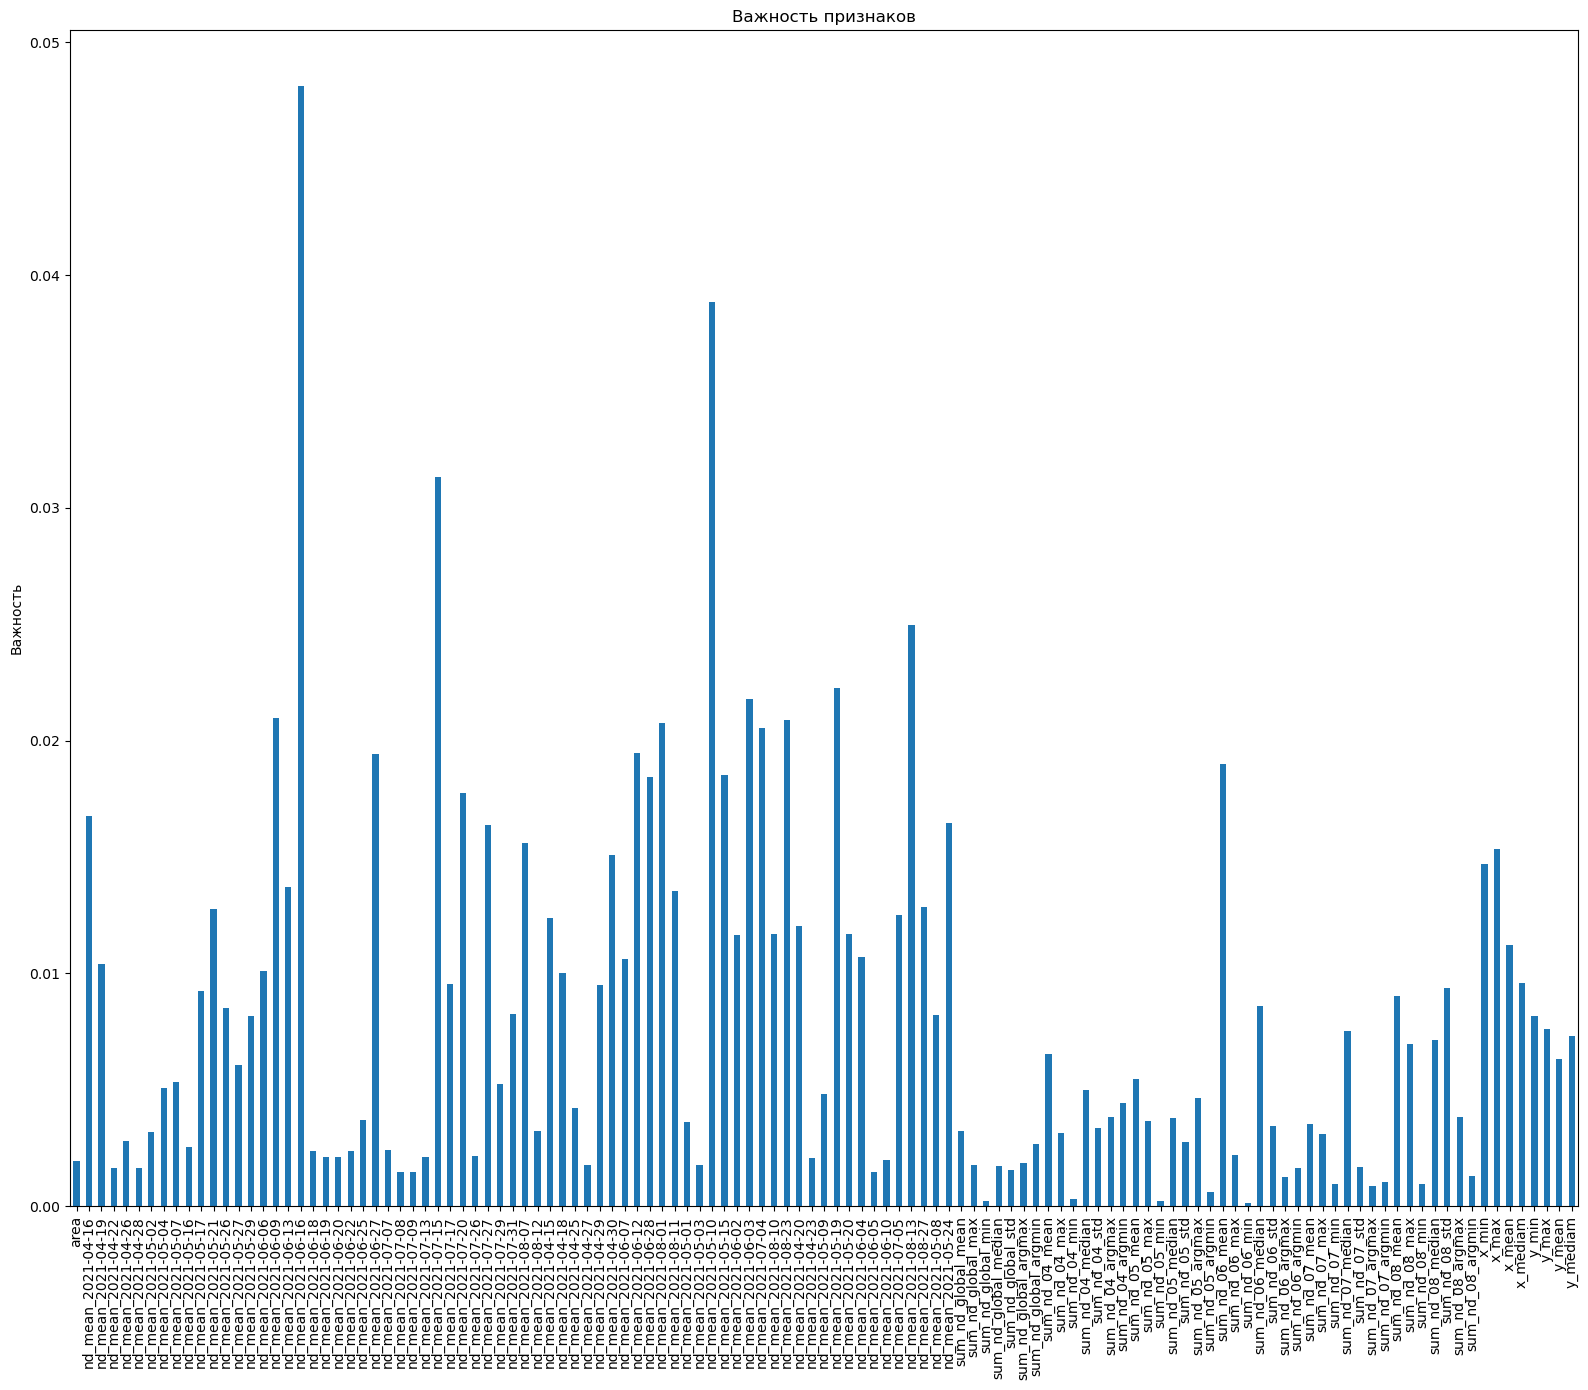

In [66]:
skl_iris_imp = pd.Series(clf.feature_importances_, clf.feature_names_in_)

fig, ax = plt.subplots(figsize=(16,14))
skl_iris_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

In [67]:
np.shape(clf.feature_importances_)

(121,)

In [68]:
np.shape([idx for idx, e in enumerate(clf.feature_names_in_) if '+' in e])

(0,)

In [69]:
np.sum(clf.feature_importances_[[idx for idx, e in enumerate(clf.feature_names_in_) if '+' in e]] > 0.005)

0

In [70]:
#mask = clf.feature_importances_[[idx for idx, e in enumerate(clf.feature_names_in_) if '+' in e]] > 0.005
#X_train = X_train[clf.feature_names_in_[mask]]
#X_test = X_test[clf.feature_names_in_[mask]]
#X_ = X[clf.feature_names_in_[mask]].copy()

In [74]:
clf = RandomForestClassifier( n_estimators = 14, )
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(clf,'\n',recall_score(y_test, pred, average="macro", zero_division=0))

/tmp/ipykernel_9630/1491333743.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=14) 
 0.939017838322141


In [75]:
from catboost import CatBoostClassifier


booster = CatBoostClassifier(iterations=500, verbose=5, task_type="GPU", devices='0:1')

booster.fit(X_train, y_train, eval_set=(X_test, y_test))

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("accuracy score:{:.6f}".format(metrics.recall_score(y_train, train_preds, average="macro", zero_division=0)))
print("accuracy score:{:.6f}".format(metrics.recall_score(y_test, test_preds, average="macro", zero_division=0)))

Learning rate set to 0.164182
0:	learn: 1.5123753	test: 1.5180536	best: 1.5180536 (0)	total: 18.2ms	remaining: 9.07s
5:	learn: 0.7937318	test: 0.8210533	best: 0.8210533 (5)	total: 82.2ms	remaining: 6.76s
10:	learn: 0.5361238	test: 0.5641368	best: 0.5641368 (10)	total: 141ms	remaining: 6.29s
15:	learn: 0.3959299	test: 0.4280717	best: 0.4280717 (15)	total: 202ms	remaining: 6.13s
20:	learn: 0.3198851	test: 0.3539199	best: 0.3539199 (20)	total: 260ms	remaining: 5.93s
25:	learn: 0.2675772	test: 0.3026647	best: 0.3026647 (25)	total: 320ms	remaining: 5.83s
30:	learn: 0.2274612	test: 0.2621903	best: 0.2621903 (30)	total: 378ms	remaining: 5.72s
35:	learn: 0.2014759	test: 0.2374089	best: 0.2374089 (35)	total: 436ms	remaining: 5.61s
40:	learn: 0.1841679	test: 0.2226806	best: 0.2226806 (40)	total: 491ms	remaining: 5.49s
45:	learn: 0.1676333	test: 0.2086497	best: 0.2086497 (45)	total: 548ms	remaining: 5.41s
50:	learn: 0.1557340	test: 0.1997267	best: 0.1997267 (50)	total: 601ms	remaining: 5.29s
55:	

470:	learn: 0.0171857	test: 0.1009277	best: 0.1009035 (467)	total: 5.1s	remaining: 314ms
475:	learn: 0.0169422	test: 0.1003652	best: 0.1003652 (475)	total: 5.15s	remaining: 260ms
480:	learn: 0.0167131	test: 0.1000108	best: 0.1000108 (480)	total: 5.2s	remaining: 206ms
485:	learn: 0.0164966	test: 0.1002480	best: 0.0999816 (481)	total: 5.26s	remaining: 152ms
490:	learn: 0.0163033	test: 0.0999591	best: 0.0999591 (490)	total: 5.32s	remaining: 97.4ms
495:	learn: 0.0161045	test: 0.1000998	best: 0.0998609 (491)	total: 5.37s	remaining: 43.3ms
499:	learn: 0.0159188	test: 0.1003729	best: 0.0998609 (491)	total: 5.41s	remaining: 0us
bestTest = 0.09986085037
bestIteration = 491
Shrink model to first 492 iterations.
accuracy score:1.000000
accuracy score:0.964372


In [76]:
from catboost import CatBoostClassifier


booster = CatBoostClassifier(iterations=1000, verbose=5, task_type="GPU", devices='0:1')

booster.fit(X_train, y_train, eval_set=(X_test, y_test))

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("accuracy score:{:.6f}".format(metrics.recall_score(y_train, train_preds, average="macro", zero_division=0)))
print("accuracy score:{:.6f}".format(metrics.recall_score(y_test, test_preds, average="macro", zero_division=0)))

Learning rate set to 0.121276
0:	learn: 1.6170876	test: 1.6213866	best: 1.6213866 (0)	total: 16.7ms	remaining: 16.7s
5:	learn: 0.9442622	test: 0.9709915	best: 0.9709915 (5)	total: 82ms	remaining: 13.6s
10:	learn: 0.6719407	test: 0.7030796	best: 0.7030796 (10)	total: 145ms	remaining: 13s
15:	learn: 0.5129723	test: 0.5457146	best: 0.5457146 (15)	total: 205ms	remaining: 12.6s
20:	learn: 0.4154606	test: 0.4520098	best: 0.4520098 (20)	total: 262ms	remaining: 12.2s
25:	learn: 0.3484107	test: 0.3882639	best: 0.3882639 (25)	total: 321ms	remaining: 12s
30:	learn: 0.2996589	test: 0.3376821	best: 0.3376821 (30)	total: 377ms	remaining: 11.8s
35:	learn: 0.2633174	test: 0.3021076	best: 0.3021076 (35)	total: 434ms	remaining: 11.6s
40:	learn: 0.2380976	test: 0.2779703	best: 0.2779703 (40)	total: 491ms	remaining: 11.5s
45:	learn: 0.2166732	test: 0.2576240	best: 0.2576240 (45)	total: 547ms	remaining: 11.4s
50:	learn: 0.1992152	test: 0.2414836	best: 0.2414836 (50)	total: 602ms	remaining: 11.2s
55:	learn:

470:	learn: 0.0259403	test: 0.1111082	best: 0.1111082 (470)	total: 5.12s	remaining: 5.75s
475:	learn: 0.0256178	test: 0.1108504	best: 0.1108504 (475)	total: 5.17s	remaining: 5.69s
480:	learn: 0.0253612	test: 0.1105718	best: 0.1105557 (479)	total: 5.22s	remaining: 5.63s
485:	learn: 0.0250782	test: 0.1106603	best: 0.1105423 (481)	total: 5.27s	remaining: 5.58s
490:	learn: 0.0247935	test: 0.1102485	best: 0.1102485 (490)	total: 5.33s	remaining: 5.52s
495:	learn: 0.0244941	test: 0.1102402	best: 0.1101620 (493)	total: 5.38s	remaining: 5.46s
500:	learn: 0.0241569	test: 0.1102506	best: 0.1100645 (496)	total: 5.43s	remaining: 5.41s
505:	learn: 0.0238945	test: 0.1099503	best: 0.1099503 (505)	total: 5.49s	remaining: 5.36s
510:	learn: 0.0236615	test: 0.1097648	best: 0.1097648 (510)	total: 5.54s	remaining: 5.3s
515:	learn: 0.0234309	test: 0.1097208	best: 0.1096717 (513)	total: 5.59s	remaining: 5.25s
520:	learn: 0.0230905	test: 0.1094845	best: 0.1094694 (518)	total: 5.65s	remaining: 5.19s
525:	learn:

930:	learn: 0.0100283	test: 0.0980406	best: 0.0980194 (929)	total: 10s	remaining: 745ms
935:	learn: 0.0099721	test: 0.0979259	best: 0.0979259 (935)	total: 10.1s	remaining: 690ms
940:	learn: 0.0098959	test: 0.0979751	best: 0.0979105 (937)	total: 10.2s	remaining: 636ms
945:	learn: 0.0098362	test: 0.0977493	best: 0.0977493 (945)	total: 10.2s	remaining: 582ms
950:	learn: 0.0097741	test: 0.0976569	best: 0.0976569 (950)	total: 10.3s	remaining: 529ms
955:	learn: 0.0097013	test: 0.0976146	best: 0.0975772 (952)	total: 10.3s	remaining: 475ms
960:	learn: 0.0096425	test: 0.0974538	best: 0.0974538 (960)	total: 10.4s	remaining: 421ms
965:	learn: 0.0095747	test: 0.0972656	best: 0.0972656 (965)	total: 10.4s	remaining: 367ms
970:	learn: 0.0095153	test: 0.0973054	best: 0.0972496 (966)	total: 10.5s	remaining: 313ms
975:	learn: 0.0094341	test: 0.0971097	best: 0.0971097 (975)	total: 10.5s	remaining: 259ms
980:	learn: 0.0093945	test: 0.0970321	best: 0.0970140 (979)	total: 10.6s	remaining: 205ms
985:	learn: 

In [77]:
from catboost import CatBoostClassifier


booster = CatBoostClassifier(iterations=2000, verbose=5, task_type="GPU", devices='0:1')

booster.fit(X_train, y_train, eval_set=(X_test, y_test))

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("accuracy score:{:.6f}".format(metrics.recall_score(y_train, train_preds, average="macro", zero_division=0)))
print("accuracy score:{:.6f}".format(metrics.recall_score(y_test, test_preds, average="macro", zero_division=0)))

Learning rate set to 0.089583
0:	learn: 1.6986440	test: 1.7018747	best: 1.7018747 (0)	total: 14.6ms	remaining: 29.3s
5:	learn: 1.0923681	test: 1.1162167	best: 1.1162167 (5)	total: 77ms	remaining: 25.6s
10:	learn: 0.8129516	test: 0.8447188	best: 0.8447188 (10)	total: 135ms	remaining: 24.5s
15:	learn: 0.6404699	test: 0.6762984	best: 0.6762984 (15)	total: 194ms	remaining: 24.1s
20:	learn: 0.5271801	test: 0.5617244	best: 0.5617244 (20)	total: 249ms	remaining: 23.5s
25:	learn: 0.4495127	test: 0.4863431	best: 0.4863431 (25)	total: 304ms	remaining: 23.1s
30:	learn: 0.3902536	test: 0.4280314	best: 0.4280314 (30)	total: 365ms	remaining: 23.2s
35:	learn: 0.3445740	test: 0.3816897	best: 0.3816897 (35)	total: 421ms	remaining: 23s
40:	learn: 0.3050608	test: 0.3426243	best: 0.3426243 (40)	total: 476ms	remaining: 22.8s
45:	learn: 0.2765430	test: 0.3137570	best: 0.3137570 (45)	total: 533ms	remaining: 22.6s
50:	learn: 0.2536902	test: 0.2923130	best: 0.2923130 (50)	total: 586ms	remaining: 22.4s
55:	lear

475:	learn: 0.0363627	test: 0.1187354	best: 0.1187309 (474)	total: 5.17s	remaining: 16.6s
480:	learn: 0.0359816	test: 0.1185027	best: 0.1185027 (480)	total: 5.22s	remaining: 16.5s
485:	learn: 0.0355956	test: 0.1185161	best: 0.1183577 (483)	total: 5.28s	remaining: 16.4s
490:	learn: 0.0350856	test: 0.1182887	best: 0.1182887 (490)	total: 5.33s	remaining: 16.4s
495:	learn: 0.0347438	test: 0.1182793	best: 0.1182085 (494)	total: 5.38s	remaining: 16.3s
500:	learn: 0.0343653	test: 0.1180117	best: 0.1179318 (499)	total: 5.43s	remaining: 16.3s
505:	learn: 0.0339240	test: 0.1175819	best: 0.1175819 (505)	total: 5.48s	remaining: 16.2s
510:	learn: 0.0336459	test: 0.1174045	best: 0.1174045 (510)	total: 5.54s	remaining: 16.1s
515:	learn: 0.0333178	test: 0.1171511	best: 0.1171511 (515)	total: 5.59s	remaining: 16.1s
520:	learn: 0.0330235	test: 0.1170119	best: 0.1170119 (520)	total: 5.65s	remaining: 16s
525:	learn: 0.0327047	test: 0.1171394	best: 0.1170119 (520)	total: 5.7s	remaining: 16s
530:	learn: 0.0

935:	learn: 0.0152699	test: 0.1041112	best: 0.1040289 (928)	total: 10.2s	remaining: 11.5s
940:	learn: 0.0151933	test: 0.1041039	best: 0.1040289 (928)	total: 10.2s	remaining: 11.5s
945:	learn: 0.0151052	test: 0.1040498	best: 0.1040002 (944)	total: 10.3s	remaining: 11.4s
950:	learn: 0.0149672	test: 0.1038221	best: 0.1038221 (950)	total: 10.3s	remaining: 11.4s
955:	learn: 0.0148806	test: 0.1036883	best: 0.1036883 (955)	total: 10.4s	remaining: 11.3s
960:	learn: 0.0147591	test: 0.1034918	best: 0.1034918 (960)	total: 10.4s	remaining: 11.3s
965:	learn: 0.0146491	test: 0.1033935	best: 0.1033935 (965)	total: 10.5s	remaining: 11.2s
970:	learn: 0.0145492	test: 0.1034499	best: 0.1033920 (966)	total: 10.5s	remaining: 11.2s
975:	learn: 0.0144280	test: 0.1032032	best: 0.1032032 (975)	total: 10.6s	remaining: 11.1s
980:	learn: 0.0143393	test: 0.1033083	best: 0.1032032 (975)	total: 10.6s	remaining: 11.1s
985:	learn: 0.0142183	test: 0.1031009	best: 0.1030768 (984)	total: 10.7s	remaining: 11s
990:	learn: 

1395:	learn: 0.0087982	test: 0.0980534	best: 0.0979247 (1392)	total: 15s	remaining: 6.5s
1400:	learn: 0.0087599	test: 0.0981497	best: 0.0979247 (1392)	total: 15.1s	remaining: 6.45s
1405:	learn: 0.0087219	test: 0.0980449	best: 0.0979247 (1392)	total: 15.1s	remaining: 6.39s
1410:	learn: 0.0086887	test: 0.0980055	best: 0.0979247 (1392)	total: 15.2s	remaining: 6.34s
1415:	learn: 0.0086512	test: 0.0981293	best: 0.0979247 (1392)	total: 15.2s	remaining: 6.28s
1420:	learn: 0.0086128	test: 0.0980447	best: 0.0979247 (1392)	total: 15.3s	remaining: 6.23s
1425:	learn: 0.0085730	test: 0.0979266	best: 0.0979247 (1392)	total: 15.3s	remaining: 6.17s
1430:	learn: 0.0085267	test: 0.0979084	best: 0.0978954 (1428)	total: 15.4s	remaining: 6.12s
1435:	learn: 0.0084760	test: 0.0977235	best: 0.0977235 (1435)	total: 15.4s	remaining: 6.07s
1440:	learn: 0.0084336	test: 0.0977657	best: 0.0977235 (1435)	total: 15.5s	remaining: 6.01s
1445:	learn: 0.0083812	test: 0.0978935	best: 0.0977235 (1435)	total: 15.6s	remainin

1855:	learn: 0.0059091	test: 0.0947796	best: 0.0947796 (1855)	total: 19.9s	remaining: 1.55s
1860:	learn: 0.0058858	test: 0.0947088	best: 0.0947088 (1860)	total: 20s	remaining: 1.49s
1865:	learn: 0.0058640	test: 0.0947235	best: 0.0947088 (1860)	total: 20.1s	remaining: 1.44s
1870:	learn: 0.0058468	test: 0.0947765	best: 0.0946912 (1866)	total: 20.1s	remaining: 1.39s
1875:	learn: 0.0058264	test: 0.0948179	best: 0.0946912 (1866)	total: 20.2s	remaining: 1.33s
1880:	learn: 0.0058029	test: 0.0947947	best: 0.0946912 (1866)	total: 20.2s	remaining: 1.28s
1885:	learn: 0.0057838	test: 0.0947625	best: 0.0946912 (1866)	total: 20.3s	remaining: 1.22s
1890:	learn: 0.0057615	test: 0.0946884	best: 0.0946884 (1890)	total: 20.3s	remaining: 1.17s
1895:	learn: 0.0057328	test: 0.0945808	best: 0.0945483 (1894)	total: 20.4s	remaining: 1.12s
1900:	learn: 0.0057011	test: 0.0944361	best: 0.0944361 (1900)	total: 20.4s	remaining: 1.06s
1905:	learn: 0.0056813	test: 0.0945095	best: 0.0944361 (1900)	total: 20.5s	remaini

In [79]:
from catboost import CatBoostClassifier


booster = CatBoostClassifier(iterations=3000, verbose=5, task_type="GPU", devices='0:1')

booster.fit(X_train, y_train, eval_set=(X_test, y_test))

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("accuracy score:{:.6f}".format(metrics.recall_score(y_train, train_preds, average="macro", zero_division=0)))
print("accuracy score:{:.6f}".format(metrics.recall_score(y_test, test_preds, average="macro", zero_division=0)))

Learning rate set to 0.075037
0:	learn: 1.7371863	test: 1.7399131	best: 1.7399131 (0)	total: 16.4ms	remaining: 49.2s
5:	learn: 1.1815141	test: 1.2013561	best: 1.2013561 (5)	total: 81ms	remaining: 40.4s
10:	learn: 0.9133552	test: 0.9334458	best: 0.9334458 (10)	total: 149ms	remaining: 40.4s
15:	learn: 0.7253558	test: 0.7529616	best: 0.7529616 (15)	total: 213ms	remaining: 39.7s
20:	learn: 0.6070088	test: 0.6378231	best: 0.6378231 (20)	total: 272ms	remaining: 38.6s
25:	learn: 0.5204327	test: 0.5528202	best: 0.5528202 (25)	total: 333ms	remaining: 38.1s
30:	learn: 0.4536378	test: 0.4876968	best: 0.4876968 (30)	total: 389ms	remaining: 37.2s
35:	learn: 0.4022553	test: 0.4387012	best: 0.4387012 (35)	total: 448ms	remaining: 36.9s
40:	learn: 0.3602535	test: 0.3991045	best: 0.3991045 (40)	total: 508ms	remaining: 36.7s
45:	learn: 0.3280292	test: 0.3673126	best: 0.3673126 (45)	total: 566ms	remaining: 36.4s
50:	learn: 0.3020890	test: 0.3416820	best: 0.3416820 (50)	total: 621ms	remaining: 35.9s
55:	le

475:	learn: 0.0456519	test: 0.1229803	best: 0.1229803 (475)	total: 5.23s	remaining: 27.8s
480:	learn: 0.0452116	test: 0.1227863	best: 0.1227863 (480)	total: 5.29s	remaining: 27.7s
485:	learn: 0.0447130	test: 0.1225901	best: 0.1225265 (484)	total: 5.34s	remaining: 27.6s
490:	learn: 0.0442682	test: 0.1225656	best: 0.1225128 (487)	total: 5.39s	remaining: 27.6s
495:	learn: 0.0438725	test: 0.1224379	best: 0.1224379 (495)	total: 5.44s	remaining: 27.5s
500:	learn: 0.0432696	test: 0.1222784	best: 0.1221964 (499)	total: 5.5s	remaining: 27.4s
505:	learn: 0.0428832	test: 0.1221621	best: 0.1221176 (504)	total: 5.55s	remaining: 27.4s
510:	learn: 0.0425362	test: 0.1222682	best: 0.1221176 (504)	total: 5.6s	remaining: 27.3s
515:	learn: 0.0421696	test: 0.1218399	best: 0.1218399 (515)	total: 5.66s	remaining: 27.2s
520:	learn: 0.0416509	test: 0.1217450	best: 0.1216541 (519)	total: 5.71s	remaining: 27.1s
525:	learn: 0.0411577	test: 0.1212664	best: 0.1212664 (525)	total: 5.76s	remaining: 27.1s
530:	learn: 

935:	learn: 0.0199298	test: 0.1041257	best: 0.1041247 (934)	total: 10.2s	remaining: 22.5s
940:	learn: 0.0198300	test: 0.1042995	best: 0.1041247 (934)	total: 10.3s	remaining: 22.5s
945:	learn: 0.0196864	test: 0.1041430	best: 0.1041114 (944)	total: 10.3s	remaining: 22.4s
950:	learn: 0.0195502	test: 0.1041154	best: 0.1040691 (948)	total: 10.4s	remaining: 22.4s
955:	learn: 0.0194436	test: 0.1039447	best: 0.1039447 (955)	total: 10.4s	remaining: 22.3s
960:	learn: 0.0193128	test: 0.1037276	best: 0.1037276 (960)	total: 10.5s	remaining: 22.2s
965:	learn: 0.0191965	test: 0.1036277	best: 0.1036277 (965)	total: 10.5s	remaining: 22.2s
970:	learn: 0.0190992	test: 0.1036143	best: 0.1035960 (966)	total: 10.6s	remaining: 22.1s
975:	learn: 0.0189769	test: 0.1035344	best: 0.1035172 (973)	total: 10.6s	remaining: 22.1s
980:	learn: 0.0188604	test: 0.1035071	best: 0.1034781 (979)	total: 10.7s	remaining: 22s
985:	learn: 0.0187322	test: 0.1035207	best: 0.1034781 (979)	total: 10.8s	remaining: 22s
990:	learn: 0.

1395:	learn: 0.0114608	test: 0.0975310	best: 0.0975310 (1395)	total: 15.2s	remaining: 17.4s
1400:	learn: 0.0114096	test: 0.0975954	best: 0.0975310 (1395)	total: 15.2s	remaining: 17.4s
1405:	learn: 0.0113682	test: 0.0974814	best: 0.0974814 (1405)	total: 15.3s	remaining: 17.3s
1410:	learn: 0.0113091	test: 0.0973214	best: 0.0973104 (1409)	total: 15.3s	remaining: 17.3s
1415:	learn: 0.0112590	test: 0.0973053	best: 0.0972697 (1412)	total: 15.4s	remaining: 17.2s
1420:	learn: 0.0112087	test: 0.0971910	best: 0.0971910 (1420)	total: 15.4s	remaining: 17.2s
1425:	learn: 0.0111367	test: 0.0970044	best: 0.0970044 (1425)	total: 15.5s	remaining: 17.1s
1430:	learn: 0.0110679	test: 0.0969630	best: 0.0969630 (1430)	total: 15.5s	remaining: 17s
1435:	learn: 0.0109991	test: 0.0968426	best: 0.0968426 (1435)	total: 15.6s	remaining: 17s
1440:	learn: 0.0109549	test: 0.0968118	best: 0.0968118 (1440)	total: 15.6s	remaining: 16.9s
1445:	learn: 0.0108906	test: 0.0968441	best: 0.0968118 (1440)	total: 15.7s	remaining

1855:	learn: 0.0076416	test: 0.0940048	best: 0.0940048 (1855)	total: 20.1s	remaining: 12.4s
1860:	learn: 0.0076043	test: 0.0940807	best: 0.0940048 (1855)	total: 20.2s	remaining: 12.3s
1865:	learn: 0.0075697	test: 0.0939637	best: 0.0939637 (1865)	total: 20.2s	remaining: 12.3s
1870:	learn: 0.0075458	test: 0.0938967	best: 0.0938967 (1870)	total: 20.3s	remaining: 12.2s
1875:	learn: 0.0075213	test: 0.0939517	best: 0.0938967 (1870)	total: 20.3s	remaining: 12.2s
1880:	learn: 0.0074924	test: 0.0939223	best: 0.0938923 (1879)	total: 20.4s	remaining: 12.1s
1885:	learn: 0.0074694	test: 0.0939048	best: 0.0938785 (1881)	total: 20.5s	remaining: 12.1s
1890:	learn: 0.0074413	test: 0.0938462	best: 0.0938248 (1889)	total: 20.5s	remaining: 12s
1895:	learn: 0.0074016	test: 0.0938042	best: 0.0937279 (1892)	total: 20.6s	remaining: 12s
1900:	learn: 0.0073712	test: 0.0936284	best: 0.0936276 (1899)	total: 20.6s	remaining: 11.9s
1905:	learn: 0.0073512	test: 0.0936919	best: 0.0936170 (1901)	total: 20.7s	remaining

2315:	learn: 0.0055902	test: 0.0924103	best: 0.0923855 (2312)	total: 25.1s	remaining: 7.42s
2320:	learn: 0.0055743	test: 0.0924239	best: 0.0923855 (2312)	total: 25.2s	remaining: 7.37s
2325:	learn: 0.0055617	test: 0.0924195	best: 0.0923855 (2312)	total: 25.2s	remaining: 7.32s
2330:	learn: 0.0055441	test: 0.0924161	best: 0.0923855 (2312)	total: 25.3s	remaining: 7.26s
2335:	learn: 0.0055308	test: 0.0924224	best: 0.0923800 (2331)	total: 25.3s	remaining: 7.21s
2340:	learn: 0.0055204	test: 0.0924151	best: 0.0923800 (2331)	total: 25.4s	remaining: 7.15s
2345:	learn: 0.0055047	test: 0.0924285	best: 0.0923800 (2331)	total: 25.5s	remaining: 7.1s
2350:	learn: 0.0054895	test: 0.0924110	best: 0.0923800 (2331)	total: 25.5s	remaining: 7.04s
2355:	learn: 0.0054695	test: 0.0924389	best: 0.0923800 (2331)	total: 25.6s	remaining: 6.99s
2360:	learn: 0.0054528	test: 0.0924882	best: 0.0923800 (2331)	total: 25.6s	remaining: 6.93s
2365:	learn: 0.0054281	test: 0.0923744	best: 0.0923744 (2365)	total: 25.7s	remain

2775:	learn: 0.0043651	test: 0.0912384	best: 0.0912384 (2775)	total: 30.1s	remaining: 2.43s
2780:	learn: 0.0043528	test: 0.0912270	best: 0.0912026 (2778)	total: 30.1s	remaining: 2.37s
2785:	learn: 0.0043422	test: 0.0912792	best: 0.0912026 (2778)	total: 30.2s	remaining: 2.32s
2790:	learn: 0.0043311	test: 0.0912204	best: 0.0912026 (2778)	total: 30.3s	remaining: 2.27s
2795:	learn: 0.0043183	test: 0.0912396	best: 0.0911802 (2793)	total: 30.3s	remaining: 2.21s
2800:	learn: 0.0043073	test: 0.0912662	best: 0.0911802 (2793)	total: 30.4s	remaining: 2.16s
2805:	learn: 0.0042970	test: 0.0912243	best: 0.0911802 (2793)	total: 30.4s	remaining: 2.1s
2810:	learn: 0.0042891	test: 0.0912091	best: 0.0911802 (2793)	total: 30.5s	remaining: 2.05s
2815:	learn: 0.0042791	test: 0.0912010	best: 0.0911802 (2793)	total: 30.5s	remaining: 1.99s
2820:	learn: 0.0042698	test: 0.0912230	best: 0.0911802 (2793)	total: 30.6s	remaining: 1.94s
2825:	learn: 0.0042594	test: 0.0913071	best: 0.0911802 (2793)	total: 30.6s	remain

In [ ]:
print(f"Cuda доступна {torch.cuda.is_available()}. Версия cuda {torch.version.cuda}")

gpu_id = 0
gpu_str = "cuda:{}".format(gpu_id)
device = torch.device(gpu_str if torch.cuda.is_available() else "cpu")

x_cpu = torch.ones((3, 3))
idx_cpus = set()
devices_cpu = {}
devices_gpu = {}

for idx in range(1000):
    device = torch.device(f"cpu:{idx}")
    x_cpu = x_cpu.to(device)
    if id(x_cpu) not in idx_cpus:
        idx_cpus.add(id(x_cpu))
        devices_cpu[f"cpu:{idx}"] = device
        print("x_cpu:{} device: {} is_cuda: {} id: {}".format(idx, x_cpu.device, x_cpu.is_cuda, id(x_cpu)))
    else:
        break
        
device_count = torch.cuda.device_count()

print("\ndevice_count: {}".format(device_count))

print(f"Используется cuda:{torch.cuda.current_device()}")

for idx in range(torch.cuda.device_count()):
    device = torch.device(f"cuda:{idx}")
    x_gpu = x_cpu.to(device)
    print("x_gpu:\ndevice: {} is_cuda: {} id: {}".format(x_gpu.device, x_gpu.is_cuda, id(x_gpu)))
    device_name = torch.cuda.get_device_name(idx)
    print("\ndevice_name {}: {}".format(idx, device_name))
    #print(torch.cuda.memory_stats(device))
    print(torch.cuda.get_device_capability(idx))
    devices_gpu[f"cuda:{idx}"] = (device_name, device)

In [83]:
params = {
    "path":["./DBeaver_dataset.json", "./MonitorOff_dataset.json", "./PyCharm_dataset.json", "./SSMS_dataset.json", "./VisualStudio_dataset.json", "./Windows_enter_dataset.json"],
    "path_img":"./Dataset/",
    "lr": 0.0001,
    "batch_size": 32,
    "num_workers": 4,
    "epochs": 30,
    "size": 128,
    "device": torch.device("cuda:1" if torch.cuda.is_available() else "cpu"),
    "path_model":"./best_model.mdl",
    'path_config':"./config.cfg",
    'embedding_dims':128,
}

In [86]:
if device.type == "cuda":
    print(torch.cuda.get_device_name(params["device"].index))
else:
    print("CPU")

Tesla M40


In [87]:
idx_y = y_train.loc[y_train['crop'] == 0].index

In [88]:
unique_label = np.unique(y_train['crop'])
idx_doc = {}

for idx in unique_label:
    idx_y = y_train.loc[y_train['crop'] == 0].index
    idx_doc[idx] = X_train.loc[X_train.index.isin(idx_y)]

In [89]:
from random import randrange

idx_doc[0].iloc[randrange(len(idx_doc[0]))].to_numpy()

array([ 8.11858990e-03,  6.19355685e-03,  7.97536711e-03,  3.97022347e-03,
        1.62941788e-02,  2.57734120e-02,  2.79945196e-02,  0.00000000e+00,
        9.78659520e-03,  1.77484869e-02,  1.63026200e-02,  1.08608463e-02,
        1.61802467e-02,  1.91423975e-02,  1.97633606e-02,  3.46384111e-03,
        9.26232314e-03,  0.00000000e+00,  5.51736230e-03,  1.59016299e-02,
        1.62693685e-02,  1.59813749e-02,  1.58433962e-02,  1.59797097e-02,
        2.12057788e-02,  1.53210379e-02,  1.65146375e-02,  1.58108758e-02,
        1.60208202e-02,  2.34600092e-02,  1.72843638e-02,  1.67537570e-02,
        5.40784046e-03,  1.62449962e-02,  1.83851964e-02,  1.06512040e-02,
        2.27932369e-02,  2.87107106e-03,  1.61443874e-02,  1.13849881e-02,
        2.33941864e-02,  8.28772985e-03,  1.99702715e-03,  1.50121607e-05,
        5.03767577e-03,  1.73305440e-02,  1.70996310e-03,  1.72861587e-02,
        5.49504542e-03,  0.00000000e+00,  1.27392349e-02,  5.28717503e-04,
       -2.44196635e-04,  

In [90]:
np.shape(X_train)

(4105, 121)

In [91]:
data = X_train.to_numpy()
labels = y_train['crop'].to_numpy()

In [92]:
np.shape(data), np.shape(labels)

((4105, 121), (4105,))

In [93]:
np.shape(data[(labels == 1), :])

(574, 121)

In [94]:
np.shape(data)[-1]

121

In [95]:
class ImageDataset_(Dataset):
    def __init__(self, X, y, is_train):
        self.is_train = is_train
        self.unique_label = np.unique(y['crop'].to_numpy())
        self.idx_doc = {}
        self.is_train = is_train
        self.unique_class = {}
        self.unique_anchor = {}
        self.data = X.to_numpy()
        self.labels = y['crop'].to_numpy()
        for label in self.unique_label:
            self.unique_class[label] = self.data[(self.labels == label), :]
            
        self.change_positives()
        
        
    def __len__(self):
        return len(self.labels)
    
    
    def change_positives(self):
        self.unique_anchor = {}
        for label in self.unique_label:
            self.unique_anchor[label] = randrange(len(self.unique_class[label]))

            
    def __getitem__(self, item):        
        anchor_img = self.data[item]
        anchor_label = self.labels[item]
        if self.is_train:
            positive_img = torch.tensor(self.unique_class[anchor_label][self.unique_anchor[anchor_label]])
            negative_img = [torch.tensor(self.unique_class[k][v]).float() for k, v in self.unique_anchor.items() if k != anchor_label]
            return torch.tensor(anchor_img).float(), positive_img.float(), negative_img, torch.tensor(np.array([anchor_label])).float()
        else:
            return torch.tensor(anchor_img).float(), torch.tensor(np.array([anchor_label])).float()

In [96]:
train_dataset = ImageDataset_(X_train, y_train, True)
valid_dataset = ImageDataset_(X_test, y_test, True)

In [97]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=params['batch_size'],
                                           shuffle=True,
                                           pin_memory=True,
                                           num_workers=params['num_workers'])

valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset,
                                           batch_size=params['batch_size'],
                                           # shuffle=True,
                                           pin_memory=True,
                                           num_workers=params['num_workers'])

In [98]:
class Network(nn.Module):
    def __init__(self, emb_dim=128):
        super(Network, self).__init__()
        
        self.line_1 = nn.Sequential(
            nn.Linear(np.shape(data)[-1], 512),
        )
        
        self.line_2 = nn.Sequential(
            nn.Linear(512, 384),
        )
        
        self.line_3 = nn.Sequential(
            nn.Linear(384, 256),
        )
        
        self.line_4 = nn.Sequential(
            nn.Linear(256, 192),
        )
        
        self.line_5 = nn.Sequential(
            nn.Linear(384 + 512, 512),
        )
        
        self.line_6 = nn.Sequential(
            nn.Linear(512, 256),
        )
        
        self.line_2_alter = nn.Sequential(
            nn.Linear(512, 384),
        )        
        self.line_3_alter = nn.Sequential(
            nn.Linear(384, 256),
        )        
        self.line_4_alter = nn.Sequential(
            nn.Linear(256, 192),
        )
        
        self.pred = nn.Sequential(
            nn.Linear(256, 128),
            nn.PReLU(),
            nn.Linear(128, emb_dim),
        )
        
    def forward(self, x):
        
        x_out = F.elu(self.line_1(x))
        x = F.elu(self.line_2(x_out))
        x = F.elu(self.line_3(x))
        x = F.elu(self.line_4(x))
        
        x_alt = F.elu(self.line_2_alter(x_out))
        x_alt = F.elu(self.line_3_alter(x_alt))
        x_alt = F.elu(self.line_4_alter(x_alt))
        
        x = torch.concat([x, x_alt, x_out], -1)
        
        x = F.elu(self.line_5(x))
        x = F.elu(self.line_6(x))
        x = self.pred(x)
        
        return x

In [99]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_normal_(m.weight)

In [204]:
criterion = nn.TripletMarginWithDistanceLoss(distance_function=nn.CosineSimilarity())

In [205]:
device = params["device"]

model = Network(16)
model.apply(init_weights)
model = torch.jit.script(model).to(device)

In [206]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [184]:
model

RecursiveScriptModule(
  original_name=Network
  (line_1): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(original_name=Linear)
  )
  (line_2): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(original_name=Linear)
  )
  (line_3): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(original_name=Linear)
  )
  (line_4): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(original_name=Linear)
  )
  (line_5): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(original_name=Linear)
  )
  (line_6): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(original_name=Linear)
  )
  (line_2_alter): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(original_name=Linear)
  )
  (line_3_alter): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule

In [104]:
try:
    with open(params['path_config'], "r") as f:
        config_ = json.loads(f.read())
    train_dataset.unique_anchor = {int(k):v for k, v in config_['anchors'].items()}
    print("Загружены уникальные классы")
except:
    print("Файл не найден")

Загружены уникальные классы


In [105]:
config_

{'recall_score': 0.9948969711981664,
 'anchors': {'0': 363,
  '1': 86,
  '2': 95,
  '3': 383,
  '4': 418,
  '5': 82,
  '6': 156}}

In [106]:
try:
    print(model.load_state_dict(torch.load("./recogn_model.mdl")))
except:
    print("Модель не загрузилась")

Модель не загрузилась


In [185]:
if device.type == "cuda":
    print(torch.cuda.get_device_name(params["device"].index))

Tesla M40


In [186]:
os.path.isfile(params['path_config'])

True

In [187]:
u_a = {}

for k in train_dataset.unique_anchor.keys():
    u_a[str(k)] = train_dataset.unique_anchor[k]

In [110]:
if not os.path.exists(params['path_config']):
    with open(params['path_config'], "w") as f:
        u_a = {}
        for k in train_dataset.unique_anchor.keys():
            u_a[str(k)] = train_dataset.unique_anchor[k]
        f.write(json.dumps({"recall_score":0, "anchors":u_a}))

In [111]:
with open(params['path_config'], "r") as f:
    config = json.loads(f.read())

In [112]:
train_dataset.unique_anchor = {int(k):v for k, v in config['anchors'].items()}

In [113]:
%%time
def get_data(model, data_loader):
    model.eval()
    y_true = []
    y_embedding = []
    with torch.no_grad():
        pbar_testing = tqdm_step(data_loader, desc="Testing")
        for step, (anchor_img, positive_img, negative_img, anchor_label) in enumerate(pbar_testing):
            anchor_img = anchor_img.to(device)
            anchor_label = anchor_label.to(device)
            y_t = anchor_label.cpu().detach().numpy()
            y_emb = model(anchor_img).cpu().detach().numpy()
            for idx in range(len(anchor_label)):
                y_true.append(y_t[idx])
                y_embedding.append(y_emb[idx])

    y_true = np.array(y_true)
    y_embedding = np.array(y_embedding)
    return y_embedding, y_true

CPU times: user 17 µs, sys: 1e+03 ns, total: 18 µs
Wall time: 38.9 µs


In [211]:
n_components=8

In [208]:
%%time
model.train()
ep = 40 #48
for epoch in tqdm_step(range(ep), desc="Epochs"):
    running_loss = []
    #if epoch % 10 == 0:
    #    train_loader.dataset.change_positives()
    loss_arr = []
    pbar = tqdm_step(train_loader, desc="Training")

    for step, (anchor_img, positive_img, negative_img, anchor_label) in enumerate(pbar):
        anchor_img =   anchor_img.to(device)
        positive_img = positive_img.to(device)
        negative_img = [sample.to(device) for sample in negative_img]

        for sample in negative_img:
            optimizer.zero_grad()

            anchor_out = model(anchor_img)
            positive_out = model(positive_img)
            negative_out = model(sample)

            loss = criterion(anchor_out, positive_out, negative_out)
            loss.backward()
            optimizer.step()
            l = loss.cpu().detach().numpy()
            
            loss_arr.append(l)
        pbar.postfix = f" - loss батча '{np.mean(loss_arr)}'"
        #if np.mean(loss_arr) <= 0.005:
        #    break
        
        running_loss.append(np.mean(loss_arr))
    with open(params['path_config'], "r") as f:
        config = json.loads(f.read())
    print(np.mean(running_loss))
    print(config['recall_score'])
    
    X_train_, y_train_ = get_data(model, train_loader)
    X_test_, y_test_ = get_data(model, valid_loader)
    pca=PCA(n_components=n_components, whiten=True)
    pca.fit(X_train_)
    X_train_pca=pca.transform(X_train_)
    X_test_pca=pca.transform(X_test_)
    clf = SVC()
    clf.fit(X_train_pca, y_train_)
    y_pred = clf.predict(X_test_pca)
    recall_score = metrics.recall_score(y_test_, y_pred, average="macro", zero_division=0)#[None, 'micro', 'macro', 'weighted']
    
    if recall_score > config['recall_score']:
        config['recall_score'] = recall_score
        with open(params['path_config'], "w") as f:
            f.write(json.dumps(config))
        torch.save(model.state_dict(), './recogn_model.mdl')
        print(f'Сохранено! Recall {recall_score}')
    else:
        print(f'Recall {recall_score}')
    
        
    print("Epoch: {}/{} - Loss: {:.4f}".format(epoch+1, ep, np.mean(running_loss)))

Epochs:   0%|          | 0/40 [00:00<?, ?it/s]

Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.7600119
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.7938533349491996
Epoch: 1/40 - Loss: 0.7600


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.3717623
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.8453953043939822
Epoch: 2/40 - Loss: 0.3718


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.3118182
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.8585250007169559
Epoch: 3/40 - Loss: 0.3118


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.2823041
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.8677991451573409
Epoch: 4/40 - Loss: 0.2823


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.2521296
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.8769971148975552
Epoch: 5/40 - Loss: 0.2521


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.23149902
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.8762670733914363
Epoch: 6/40 - Loss: 0.2315


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.23287132
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.8803410701398942
Epoch: 7/40 - Loss: 0.2329


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.2216568
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.88328794937468
Epoch: 8/40 - Loss: 0.2217


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.21184838
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.8925503893474317
Epoch: 9/40 - Loss: 0.2118


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.20955381
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9015918803399642
Epoch: 10/40 - Loss: 0.2096


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.20670436
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.8988557044412466
Epoch: 11/40 - Loss: 0.2067


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.19104275
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.899681164362752
Epoch: 12/40 - Loss: 0.1910


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.18992512
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9059241446466529
Epoch: 13/40 - Loss: 0.1899


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.182686
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9038928007081114
Epoch: 14/40 - Loss: 0.1827


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.17865995
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9102663556582552
Epoch: 15/40 - Loss: 0.1787


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.17574996
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9114864661936292
Epoch: 16/40 - Loss: 0.1757


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.17882514
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9126008249806222
Epoch: 17/40 - Loss: 0.1788


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.16224532
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.911175907187418
Epoch: 18/40 - Loss: 0.1622


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.15867302
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9182414297458611
Epoch: 19/40 - Loss: 0.1587


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.14535077
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.917797589676839
Epoch: 20/40 - Loss: 0.1454


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.1504447
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9136802816151113
Epoch: 21/40 - Loss: 0.1504


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.13575777
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9238608666236553
Epoch: 22/40 - Loss: 0.1358


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.1377795
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9262704474189695
Epoch: 23/40 - Loss: 0.1378


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.1310907
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9283083550667142
Epoch: 24/40 - Loss: 0.1311


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.12780906
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9294482313070654
Epoch: 25/40 - Loss: 0.1278


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.12018692
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9254332830298313
Epoch: 26/40 - Loss: 0.1202


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.1114653
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9361783629732585
Epoch: 27/40 - Loss: 0.1115


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.11215725
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9339579579030177
Epoch: 28/40 - Loss: 0.1122


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.11011475
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9310822002988156
Epoch: 29/40 - Loss: 0.1101


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.10197679
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9352750941504148
Epoch: 30/40 - Loss: 0.1020


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.104237325
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9335506362513132
Epoch: 31/40 - Loss: 0.1042


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.09670903
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9320044228658145
Epoch: 32/40 - Loss: 0.0967


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.08777358
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9322222698532076
Epoch: 33/40 - Loss: 0.0878


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.08339323
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9364616467633918
Epoch: 34/40 - Loss: 0.0834


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.081683286
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.930308847479427
Epoch: 35/40 - Loss: 0.0817


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.07737871
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9287772382721702
Epoch: 36/40 - Loss: 0.0774


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.07471055
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.936007174422137
Epoch: 37/40 - Loss: 0.0747


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.078275725
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9336192537675462
Epoch: 38/40 - Loss: 0.0783


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.06755309
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9292293998131151
Epoch: 39/40 - Loss: 0.0676


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.073813714
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall 0.9303611478955843
Epoch: 40/40 - Loss: 0.0738
CPU times: user 11min 7s, sys: 1min 51s, total: 12min 58s
Wall time: 11min 9s


In [210]:
%%time
model.train()
ep = 10
for epoch in tqdm_step(range(ep), desc="Epochs"):
    running_loss = []
    #if epoch % 10 == 0:
    #    train_loader.dataset.change_positives()
    loss_arr = []
    pbar = tqdm_step(train_loader, desc="Training")

    for step, (anchor_img, positive_img, negative_img, anchor_label) in enumerate(pbar):
        anchor_img =   anchor_img.to(device)
        positive_img = positive_img.to(device)
        negative_img = [sample.to(device) for sample in negative_img]

        for sample in negative_img:
            optimizer.zero_grad()

            anchor_out = model(anchor_img)
            positive_out = model(positive_img)
            negative_out = model(sample)

            loss = criterion(anchor_out, positive_out, negative_out)
            loss.backward()
            optimizer.step()
            l = loss.cpu().detach().numpy()
            
            loss_arr.append(l)
        pbar.postfix = f" - loss батча '{np.mean(loss_arr)}'"
        #if np.mean(loss_arr) <= 0.005:
        #    break
        
        running_loss.append(np.mean(loss_arr))
    with open(params['path_config'], "r") as f:
        config = json.loads(f.read())
    print(np.mean(running_loss))
    print(config['recall_score'])
    
    X_train_, y_train_ = get_data(model, train_loader)
    X_test_, y_test_ = get_data(model, valid_loader)
    pca=PCA(n_components=n_components, whiten=True)
    pca.fit(X_train_)
    X_train_pca=pca.transform(X_train_)
    X_test_pca=pca.transform(X_test_)
    clf = SVC()
    clf.fit(X_train_pca, y_train_)
    y_pred = clf.predict(X_test_pca)
    recall_score = metrics.recall_score(y_test_, y_pred, average="macro", zero_division=0)#[None, 'micro', 'macro', 'weighted']
    
    if recall_score > config['recall_score']:
        config['recall_score'] = recall_score
        with open(params['path_config'], "w") as f:
            f.write(json.dumps(config))
        torch.save(model.state_dict(), './recogn_model.mdl')
        print(f'Сохранено! {recall_score}')
    else:
        print(f'{recall_score}')
    
        
    print("Epoch: {}/{} - Loss: {:.4f}".format(epoch+1, ep, np.mean(running_loss)))

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.06823089
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9435583018505475
Epoch: 1/10 - Loss: 0.0682


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.06626881
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9443560122390506
Epoch: 2/10 - Loss: 0.0663


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.06871763
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9429310944458464
Epoch: 3/10 - Loss: 0.0687


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.057873636
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9403187451583054
Epoch: 4/10 - Loss: 0.0579


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.058737025
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9431694596260736
Epoch: 5/10 - Loss: 0.0587


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.055165354
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9430111354268288
Epoch: 6/10 - Loss: 0.0552


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.05967145
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9412582693319372
Epoch: 7/10 - Loss: 0.0597


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.0589768
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

0.939379537860266
Epoch: 8/10 - Loss: 0.0590


/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.050379574
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

0.9377900131614975
Epoch: 9/10 - Loss: 0.0504


/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.055609804
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9369079301624529
Epoch: 10/10 - Loss: 0.0556
CPU times: user 2min 49s, sys: 28.9 s, total: 3min 18s
Wall time: 2min 49s


In [212]:
%%time
model.train()
ep = 5
for epoch in tqdm_step(range(ep), desc="Epochs"):
    running_loss = []
    #if epoch % 10 == 0:
    #    train_loader.dataset.change_positives()
    loss_arr = []
    pbar = tqdm_step(train_loader, desc="Training")

    for step, (anchor_img, positive_img, negative_img, anchor_label) in enumerate(pbar):
        anchor_img =   anchor_img.to(device)
        positive_img = positive_img.to(device)
        negative_img = [sample.to(device) for sample in negative_img]

        for sample in negative_img:
            optimizer.zero_grad()

            anchor_out = model(anchor_img)
            positive_out = model(positive_img)
            negative_out = model(sample)

            loss = criterion(anchor_out, positive_out, negative_out)
            loss.backward()
            optimizer.step()
            l = loss.cpu().detach().numpy()
            
            loss_arr.append(l)
        pbar.postfix = f" - loss батча '{np.mean(loss_arr)}'"
        #if np.mean(loss_arr) <= 0.005:
        #    break
        
        running_loss.append(np.mean(loss_arr))
    with open(params['path_config'], "r") as f:
        config = json.loads(f.read())
    print(np.mean(running_loss))
    print(config['recall_score'])
    
    X_train_, y_train_ = get_data(model, train_loader)
    X_test_, y_test_ = get_data(model, valid_loader)
    pca=PCA(n_components=n_components, whiten=True)
    pca.fit(X_train_)
    X_train_pca=pca.transform(X_train_)
    X_test_pca=pca.transform(X_test_)
    clf = SVC()
    clf.fit(X_train_pca, y_train_)
    y_pred = clf.predict(X_test_pca)
    recall_score = metrics.recall_score(y_test_, y_pred, average="macro", zero_division=0)#[None, 'micro', 'macro', 'weighted']
    
    if recall_score > config['recall_score']:
        config['recall_score'] = recall_score
        with open(params['path_config'], "w") as f:
            f.write(json.dumps(config))
        torch.save(model.state_dict(), './recogn_model.mdl')
        print(f'Сохранено! {recall_score}')
    else:
        print(f'{recall_score}')
    
        
    print("Epoch: {}/{} - Loss: {:.4f}".format(epoch+1, ep, np.mean(running_loss)))

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.049090702
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

0.9414328229424146
Epoch: 1/5 - Loss: 0.0491


/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.04923598
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9383831972950542
Epoch: 2/5 - Loss: 0.0492


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.05016766
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9373211299560414
Epoch: 3/5 - Loss: 0.0502


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.0442065
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9351467425956388
Epoch: 4/5 - Loss: 0.0442


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.050491992
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

0.9416750454352766
Epoch: 5/5 - Loss: 0.0505
CPU times: user 1min 19s, sys: 13.7 s, total: 1min 33s
Wall time: 1min 19s


/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [163]:
optimizer = optim.Adam(model.parameters(), lr=0.000001)

In [164]:
%%time
model.train()
ep = 10
for epoch in tqdm_step(range(ep), desc="Epochs"):
    running_loss = []
    #if epoch % 10 == 0:
    #    train_loader.dataset.change_positives()
    loss_arr = []
    pbar = tqdm_step(train_loader, desc="Training")

    for step, (anchor_img, positive_img, negative_img, anchor_label) in enumerate(pbar):
        anchor_img =   anchor_img.to(device)
        positive_img = positive_img.to(device)
        negative_img = [sample.to(device) for sample in negative_img]

        for sample in negative_img:
            optimizer.zero_grad()

            anchor_out = model(anchor_img)
            positive_out = model(positive_img)
            negative_out = model(sample)

            loss = criterion(anchor_out, positive_out, negative_out)
            loss.backward()
            optimizer.step()
            l = loss.cpu().detach().numpy()
            
            loss_arr.append(l)
        pbar.postfix = f" - loss батча '{np.mean(loss_arr)}'"
        #if np.mean(loss_arr) <= 0.005:
        #    break
        
        running_loss.append(np.mean(loss_arr))
    with open(params['path_config'], "r") as f:
        config = json.loads(f.read())
    print(np.mean(running_loss))
    print(config['recall_score'])
    
    X_train_, y_train_ = get_data(model, train_loader)
    X_test_, y_test_ = get_data(model, valid_loader)
    pca=PCA(n_components=n_components, whiten=True)
    pca.fit(X_train_)
    X_train_pca=pca.transform(X_train_)
    X_test_pca=pca.transform(X_test_)
    clf = SVC()
    clf.fit(X_train_pca, y_train_)
    y_pred = clf.predict(X_test_pca)
    recall_score = metrics.recall_score(y_test_, y_pred, average="macro", zero_division=0)#[None, 'micro', 'macro', 'weighted']
    
    if recall_score > config['recall_score']:
        config['recall_score'] = recall_score
        with open(params['path_config'], "w") as f:
            f.write(json.dumps(config))
        torch.save(model.state_dict(), './recogn_model.mdl')
        print(f'Сохранено! {recall_score}')
    else:
        print(f'{recall_score}')
    
        
    print("Epoch: {}/{} - Loss: {:.4f}".format(epoch+1, ep, np.mean(running_loss)))

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.03593552
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9440144442656787
Epoch: 1/10 - Loss: 0.0359


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.03378559
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9399710877926547
Epoch: 2/10 - Loss: 0.0338


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.036218572
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9410610890105333
Epoch: 3/10 - Loss: 0.0362


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.034820024
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.938259968562354
Epoch: 4/10 - Loss: 0.0348


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.029574122
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.942303325035378
Epoch: 5/10 - Loss: 0.0296


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.03227103
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9407444406120434
Epoch: 6/10 - Loss: 0.0323


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.03796445
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9409027648112883
Epoch: 7/10 - Loss: 0.0380


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.038013484
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9371261817142814
Epoch: 8/10 - Loss: 0.0380


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.030802604
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.938259968562354
Epoch: 9/10 - Loss: 0.0308


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.03338428
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.938526741938371
Epoch: 10/10 - Loss: 0.0334
CPU times: user 2min 37s, sys: 27.5 s, total: 3min 5s
Wall time: 2min 39s


In [137]:
optimizer = optim.Adam(model.parameters(), lr=0.0000001)

In [138]:
%%time
model.train()
ep = 10
for epoch in tqdm_step(range(ep), desc="Epochs"):
    running_loss = []
    #if epoch % 10 == 0:
    #    train_loader.dataset.change_positives()
    loss_arr = []
    pbar = tqdm_step(train_loader, desc="Training")

    for step, (anchor_img, positive_img, negative_img, anchor_label) in enumerate(pbar):
        anchor_img =   anchor_img.to(device)
        positive_img = positive_img.to(device)
        negative_img = [sample.to(device) for sample in negative_img]

        for sample in negative_img:
            optimizer.zero_grad()

            anchor_out = model(anchor_img)
            positive_out = model(positive_img)
            negative_out = model(sample)

            loss = criterion(anchor_out, positive_out, negative_out)
            loss.backward()
            optimizer.step()
            l = loss.cpu().detach().numpy()
            
            loss_arr.append(l)
        pbar.postfix = f" - loss батча '{np.mean(loss_arr)}'"
        #if np.mean(loss_arr) <= 0.005:
        #    break
        
        running_loss.append(np.mean(loss_arr))
    with open(params['path_config'], "r") as f:
        config = json.loads(f.read())
    print(np.mean(running_loss))
    print(config['recall_score'])
    
    X_train_, y_train_ = get_data(model, train_loader)
    X_test_, y_test_ = get_data(model, valid_loader)
    pca=PCA(n_components=n_components, whiten=True)
    pca.fit(X_train_)
    X_train_pca=pca.transform(X_train_)
    X_test_pca=pca.transform(X_test_)
    clf = SVC()
    clf.fit(X_train_pca, y_train_)
    y_pred = clf.predict(X_test_pca)
    recall_score = metrics.recall_score(y_test_, y_pred, average="macro", zero_division=0)#[None, 'micro', 'macro', 'weighted']
    
    if recall_score > config['recall_score']:
        config['recall_score'] = recall_score
        with open(params['path_config'], "w") as f:
            f.write(json.dumps(config))
        torch.save(model.state_dict(), './recogn_model.mdl')
        print(f'Сохранено! {recall_score}')
    print(recall_score)
        
    print("Epoch: {}/{} - Loss: {:.4f}".format(epoch+1, ep, np.mean(running_loss)))

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.017368017
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.920299556647202
Epoch: 1/10 - Loss: 0.0174


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.017989578
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9200327832711849
Epoch: 2/10 - Loss: 0.0180


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.018740188
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9200327832711849
Epoch: 3/10 - Loss: 0.0187


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.019207695
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9200327832711849
Epoch: 4/10 - Loss: 0.0192


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.015583119
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9200327832711849
Epoch: 5/10 - Loss: 0.0156


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.016453568
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9200327832711849
Epoch: 6/10 - Loss: 0.0165


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.02045934
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9227477733461031
Epoch: 7/10 - Loss: 0.0205


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.020225713
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9227477733461031
Epoch: 8/10 - Loss: 0.0202


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.017522223
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9227477733461031
Epoch: 9/10 - Loss: 0.0175


Training:   0%|          | 0/129 [00:00<?, ?it/s]

0.018959757
0.9948969711981664


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9215055373212585
Epoch: 10/10 - Loss: 0.0190
CPU times: user 2min 45s, sys: 30.1 s, total: 3min 15s
Wall time: 2min 42s


In [ ]:
model.load_state_dict(torch.load('./recogn_model.mdl'))
model.to(device)

In [116]:
model(torch.tensor(np.array([valid_dataset[0][0].numpy()])).to(device))

tensor([[-0.6295,  1.5483, -0.2660,  1.6536,  0.7975, -2.7003,  2.3568, -0.1113,
         -0.4422,  1.2191, -0.8088, -3.8752, -0.5169,  0.1315, -1.1243,  0.2283,
          0.4812, -0.0954, -2.5607,  0.1354,  5.3669,  1.3726,  1.4986, -0.0258,
          1.6460,  1.7646,  2.7357, -1.3989,  0.0391,  2.2738, -0.3167,  0.0734,
          0.9210, -0.4719, -0.5069,  0.6622,  2.0460,  0.5004, -0.2047, -0.3501,
          1.2925,  0.0533,  2.1416,  0.7028, -0.3433, -1.0806,  0.9612,  0.1131,
         -3.0729,  0.1195,  0.3191, -0.0221, -0.8487,  2.6032,  0.9002, -1.3426,
          1.7506, -0.5623, -1.7265,  1.2910, -0.1604,  1.9936,  0.2533,  1.0466,
          1.4511, -4.2718,  3.1964, -1.3346, -0.6375,  6.6622, -1.1209, -2.9667,
          0.5603,  1.4281,  2.5573,  1.1334,  2.3752, -2.6483,  1.1943,  0.7671,
          0.4884,  0.0865, -0.5836,  2.1685,  1.2239,  0.1332, -2.8788, -1.3272,
          1.4566, -1.4026,  0.1848, -0.9616,  1.3328,  0.4301, -1.1590,  0.1390,
         -0.3532, -1.4159,  

In [139]:
data_convert = {'name_num':{e: pos for pos, e in enumerate(np.unique(y_test))}, 'num_name':{pos:e for pos, e in enumerate(np.unique(y_test))}}
data_convert

{'name_num': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6},
 'num_name': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}}

In [232]:
%%time
X_train_, y_train_ = get_data(model, train_loader)
X_test_, y_test_ = get_data(model, valid_loader)

Testing:   0%|          | 0/129 [00:00<?, ?it/s]

Testing:   0%|          | 0/23 [00:00<?, ?it/s]

CPU times: user 649 ms, sys: 719 ms, total: 1.37 s
Wall time: 1.56 s


In [214]:
X_train_ = np.concatenate([X_train_, X_train.to_numpy()], -1)
X_test_ = np.concatenate([X_test_, X_test.to_numpy()], -1)

In [215]:
np.shape(X_train.to_numpy())

(4105, 121)

In [216]:
train_dataset = ImageDataset_(X_train, y_train, True)
valid_dataset = ImageDataset_(X_test, y_test, True)

In [217]:
data_params_lst = []
data_targets_lst = []
for idx in range(len(train_dataset)):
    #print(np.shape(train_ds[idx][0].numpy()))
    mdl = torch.flatten(model(torch.tensor(np.array([train_dataset[0][0].numpy()])).to(device))).cpu().detach().numpy()
    #print(np.shape(mdl))
    data_params_lst.append(mdl)
    #print(train_dataset[idx][3])
    data_targets_lst.append(torch.tensor([float(train_dataset[idx][3])]).numpy()[0])
data_params_lst = np.array(data_params_lst)
data_targets_lst = np.array(data_targets_lst)

In [170]:
#data_params_lst

In [171]:
#X_train_, X_test_, y_train_, y_test_=train_test_split(data_params_lst, data_targets_lst, test_size=0.3, stratify=data_targets_lst, random_state=0)

In [233]:
n_components=7

In [234]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train_)

PCA(n_components=7, whiten=True)

In [235]:
X_train_pca=pca.transform(X_train_)
X_test_pca=pca.transform(X_test_)

In [227]:
#fig,ax=plt.subplots(1,1,figsize=(8,8))
#ax.imshow(pca.mean_.reshape((16,8)), cmap="gray")
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_title('Average Face')

In [228]:
clf = SVC()
clf.fit(X_train_pca, y_train_)
y_pred = clf.predict(X_train_pca)
print("accuracy score:{:.6f}".format(metrics.recall_score(y_train_, y_pred, average="macro", zero_division=0)))

/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy score:0.971503


In [229]:
clf = SVC()
clf.fit(X_train_pca, y_train_)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.6f}".format(metrics.recall_score(y_test_, y_pred, average="macro", zero_division=0)))

accuracy score:0.943076


/home/arhitegio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [230]:
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X_train_, y_train_)

/tmp/ipykernel_9630/4116114615.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_, y_train_)


RandomForestClassifier(n_estimators=10)

In [179]:
from sklearn.metrics import recall_score, precision_score

pred = clf.predict(X_test_)
print(clf,'\n',recall_score(y_test_, pred, average="macro", zero_division=0))

RandomForestClassifier(n_estimators=10) 
 0.9354816591709645


In [131]:
!pip install catboost

In [180]:
from catboost import CatBoostClassifier


booster = CatBoostClassifier(iterations=2000, verbose=10, task_type="GPU", devices='0:1')

booster.fit(X_train_, y_train_, eval_set=(X_test_, y_test_))

test_preds = booster.predict(X_test_)
train_preds = booster.predict(X_train_)

print("accuracy score:{:.6f}".format(metrics.recall_score(y_train_, train_preds, average="macro", zero_division=0)))
print("accuracy score:{:.6f}".format(metrics.recall_score(y_test_, test_preds, average="macro", zero_division=0)))

Learning rate set to 0.089583
0:	learn: 1.4999427	test: 1.5265933	best: 1.5265933 (0)	total: 21.6ms	remaining: 43.1s
10:	learn: 0.4551711	test: 0.5580937	best: 0.5580937 (10)	total: 148ms	remaining: 26.8s
20:	learn: 0.2291133	test: 0.3540362	best: 0.3540362 (20)	total: 269ms	remaining: 25.4s
30:	learn: 0.1462647	test: 0.2822395	best: 0.2822395 (30)	total: 395ms	remaining: 25.1s
40:	learn: 0.1116542	test: 0.2565268	best: 0.2565268 (40)	total: 511ms	remaining: 24.4s
50:	learn: 0.0982809	test: 0.2469892	best: 0.2469892 (50)	total: 618ms	remaining: 23.6s
60:	learn: 0.0920241	test: 0.2440240	best: 0.2440240 (60)	total: 725ms	remaining: 23s
70:	learn: 0.0884667	test: 0.2436936	best: 0.2435702 (67)	total: 829ms	remaining: 22.5s
80:	learn: 0.0841604	test: 0.2430963	best: 0.2429761 (74)	total: 932ms	remaining: 22.1s
90:	learn: 0.0823085	test: 0.2432967	best: 0.2428955 (83)	total: 1.03s	remaining: 21.6s
100:	learn: 0.0806699	test: 0.2433452	best: 0.2428955 (83)	total: 1.13s	remaining: 21.3s
110:

920:	learn: 0.0119238	test: 0.2591384	best: 0.2410903 (228)	total: 9.96s	remaining: 11.7s
930:	learn: 0.0117765	test: 0.2597567	best: 0.2410903 (228)	total: 10.1s	remaining: 11.6s
940:	learn: 0.0115459	test: 0.2602606	best: 0.2410903 (228)	total: 10.2s	remaining: 11.5s
950:	learn: 0.0113429	test: 0.2610651	best: 0.2410903 (228)	total: 10.3s	remaining: 11.4s
960:	learn: 0.0110870	test: 0.2618063	best: 0.2410903 (228)	total: 10.4s	remaining: 11.2s
970:	learn: 0.0109403	test: 0.2618260	best: 0.2410903 (228)	total: 10.5s	remaining: 11.1s
980:	learn: 0.0107433	test: 0.2625464	best: 0.2410903 (228)	total: 10.6s	remaining: 11s
990:	learn: 0.0105348	test: 0.2628663	best: 0.2410903 (228)	total: 10.7s	remaining: 10.9s
1000:	learn: 0.0103928	test: 0.2631883	best: 0.2410903 (228)	total: 10.8s	remaining: 10.8s
1010:	learn: 0.0102185	test: 0.2636482	best: 0.2410903 (228)	total: 10.9s	remaining: 10.7s
1020:	learn: 0.0100654	test: 0.2638987	best: 0.2410903 (228)	total: 11.1s	remaining: 10.6s
1030:	lea

1840:	learn: 0.0042688	test: 0.2884215	best: 0.2410903 (228)	total: 20s	remaining: 1.73s
1850:	learn: 0.0042348	test: 0.2887065	best: 0.2410903 (228)	total: 20.1s	remaining: 1.62s
1860:	learn: 0.0042062	test: 0.2889257	best: 0.2410903 (228)	total: 20.2s	remaining: 1.51s
1870:	learn: 0.0041737	test: 0.2890977	best: 0.2410903 (228)	total: 20.3s	remaining: 1.4s
1880:	learn: 0.0041474	test: 0.2892498	best: 0.2410903 (228)	total: 20.4s	remaining: 1.29s
1890:	learn: 0.0041075	test: 0.2893704	best: 0.2410903 (228)	total: 20.5s	remaining: 1.18s
1900:	learn: 0.0040693	test: 0.2895629	best: 0.2410903 (228)	total: 20.6s	remaining: 1.07s
1910:	learn: 0.0040480	test: 0.2898885	best: 0.2410903 (228)	total: 20.7s	remaining: 966ms
1920:	learn: 0.0040176	test: 0.2899192	best: 0.2410903 (228)	total: 20.8s	remaining: 857ms
1930:	learn: 0.0039848	test: 0.2901300	best: 0.2410903 (228)	total: 20.9s	remaining: 749ms
1940:	learn: 0.0039651	test: 0.2902077	best: 0.2410903 (228)	total: 21.1s	remaining: 640ms
19

In [154]:
train_dataset.unique_label

array([0, 1, 2, 3, 4, 5, 6])

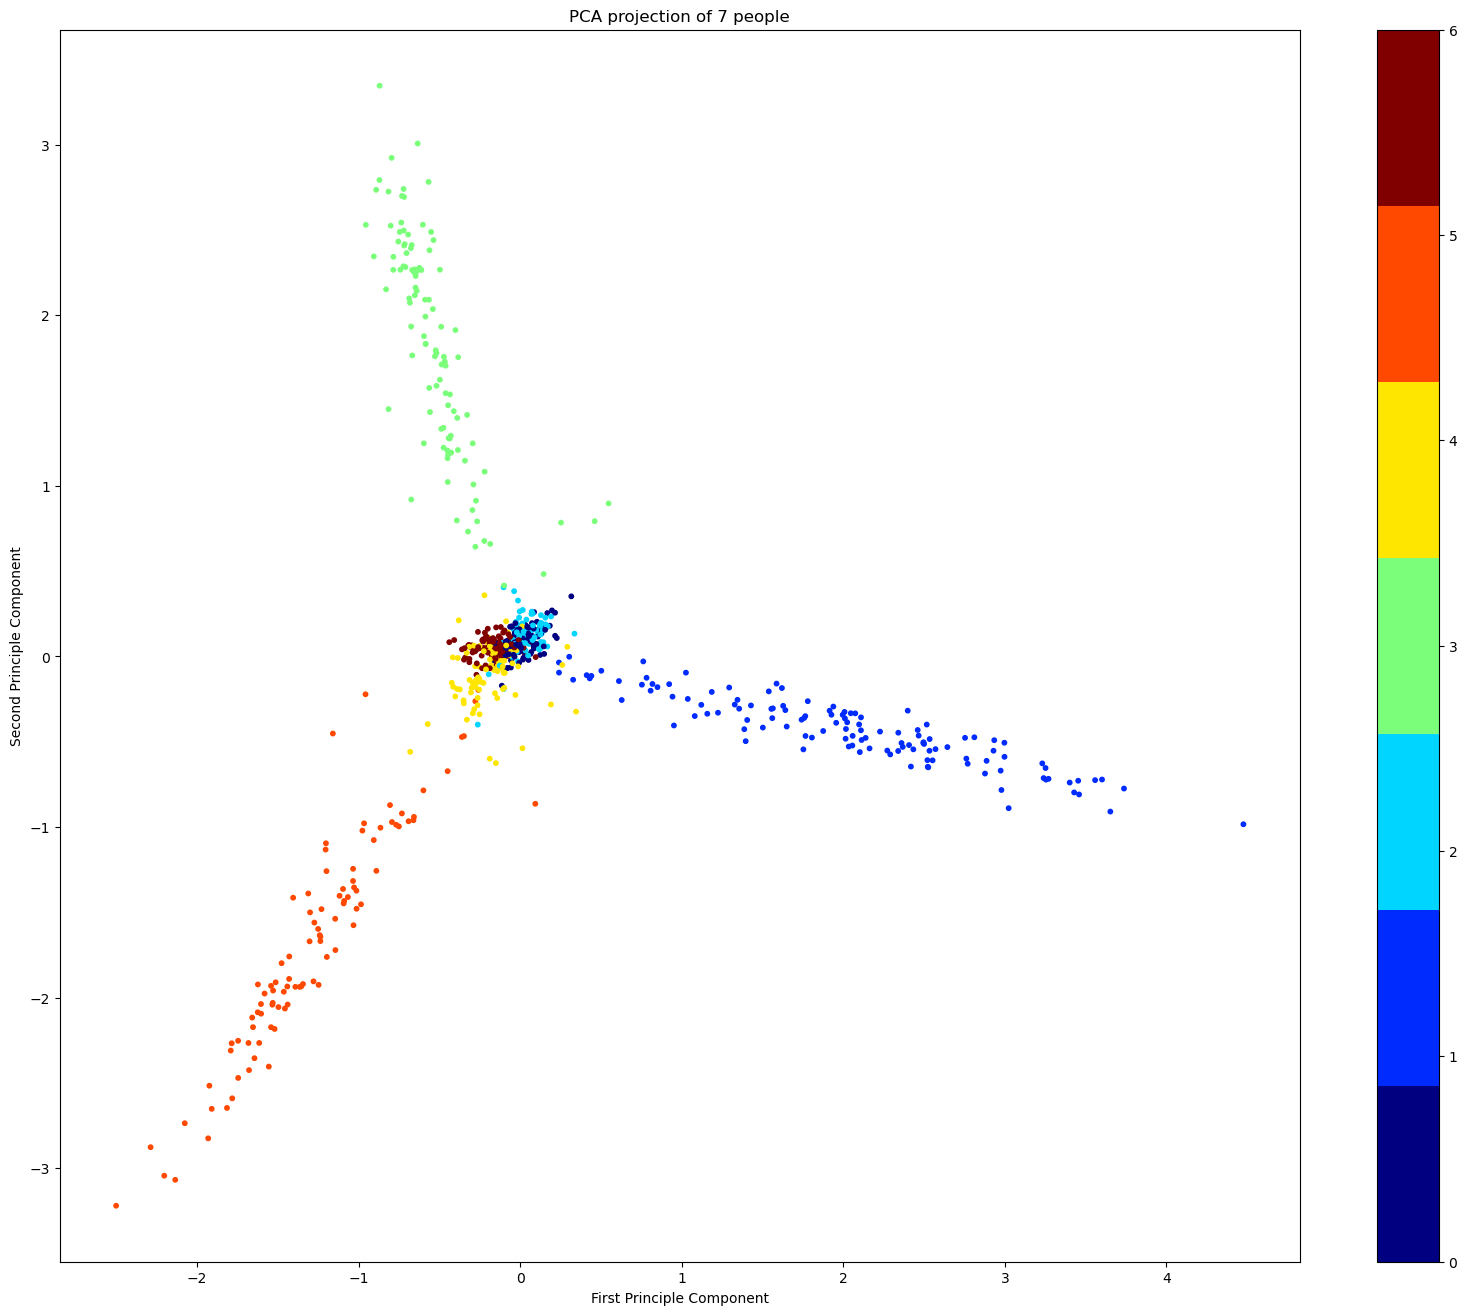

In [181]:
number_of_people=len(data_convert['num_name'])
index_range=len(y_test_)
fig=plt.figure(figsize=(20,16))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_test_pca[:index_range,0],
            X_test_pca[:index_range,1], 
            c=y_test_[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

In [ ]:
df_test = pd.read_csv("test_dataset_test.csv")

In [ ]:
df_test_id = df_test['id']

In [ ]:
calc = {}
data_arr = df_test[arr_cols].to_numpy()

df_test['sum_nd_global_mean'] = np.sum(data_arr, axis=1)
df_test['sum_nd_global_max'] = np.max(data_arr, axis=1)
df_test['sum_nd_global_min'] = np.min(data_arr, axis=1)
df_test['sum_nd_global_mean'] = np.mean(data_arr, axis=1)
df_test['sum_nd_global_median'] = np.median(data_arr, axis=1)
df_test['sum_nd_global_std'] = np.std(data_arr, axis=1)
df_test['sum_nd_global_argmax'] = np.argmax(data_arr, axis=1)
df_test['sum_nd_global_argmin'] = np.argmin(data_arr, axis=1)

for k in group_cols.keys():
    data_k_arr = df_test[group_cols[k]].to_numpy()
    df_test[f'sum_nd_{k}_mean'] = np.sum(data_k_arr, axis=1)
    df_test[f'sum_nd_{k}_max'] = np.max(data_k_arr, axis=1)
    df_test[f'sum_nd_{k}_min'] = np.min(data_k_arr, axis=1)
    df_test[f'sum_nd_{k}_mean'] = np.mean(data_k_arr, axis=1)
    df_test[f'sum_nd_{k}_median'] = np.median(data_k_arr, axis=1)
    df_test[f'sum_nd_{k}_std'] = np.std(data_k_arr, axis=1)
    df_test[f'sum_nd_{k}_argmax'] = np.argmax(data_k_arr, axis=1)
    df_test[f'sum_nd_{k}_argmin'] = np.argmin(data_k_arr, axis=1)

In [ ]:
x_min = []
x_max = []
x_mean = []
x_mediam = []
y_min = []
y_max = []
y_mean = []
y_mediam = []

geo_list = []

for idx in range(len(df_test[".geo"])):
    row = json.loads(df_test[".geo"].iloc[idx])
    x = []
    y = []
    
    el = row
    while True:
        if type(el) == type(dict()):
            keys = el.keys()
            for k in keys:
                if k in ['coordinates', 'geometries']:
                    geo_list.append(el[k])
        if type(el) == list and type(el[0]) == type(list()):
            for e in el:
                geo_list.append(e)
        if type(el) == list and type(el[0]) in (int, float) and len(el) == 2:
            x.append(el[0])
            y.append(el[1])
        if type(el) == type(list()) and type(el[0]) == type(dict()):
            for e in el:
                geo_list.append(e)
        if len(geo_list) > 0:
            el = geo_list.pop(-1)
        else:
            break
    
    if len(x) == 0:
        print('--------------------------------------------------------------')
        print(x)
        print('--------------------------------------------------------------')
        print(y)
        print('--------------------------------------------------------------')
        print(row)
    
    x_min.append(np.min(x))
    x_max.append(np.max(x))
    x_mean.append(np.mean(x))
    x_mediam.append(np.median(x))
    y_min.append(np.min(y))
    y_max.append(np.max(y))
    y_mean.append(np.mean(y))
    y_mediam.append(np.median(y))

In [ ]:
df_test['x_min'] = x_min / np.max(x_min)
df_test['x_max'] = x_max / np.max(x_max)
df_test['x_mean'] = x_mean / np.max(x_mean)
df_test['x_mediam'] = x_mediam / np.max(x_mediam)
df_test['y_min'] = y_min / np.max(y_min)
df_test['y_max'] = y_max / np.max(y_max)
df_test['y_mean'] = y_mean / np.max(y_mean)
df_test['y_mediam'] = y_mediam / np.max(y_mediam)

In [ ]:
X_test = df_test.drop(["id",".geo"], axis = 1)

In [ ]:
X_test = X_test[clf.feature_names_in_[mask]]

In [ ]:
X_test.columns

In [ ]:
from sklearn import preprocessing
import numpy as np


for col in X_test.columns:
    val = preprocessing.normalize([X_test[col].to_numpy()])
    X_test[col] = val[0]

In [ ]:
np.shape(X_test.to_numpy()), np.shape(df_test_id.to_numpy())

In [ ]:
class ImageDataset_Test(Dataset):
    def __init__(self, X, ids):
        self.X = X.to_numpy()
        self.ids = ids.to_numpy()
        
    def __len__(self):
        return len(self.X)
            
    def __getitem__(self, item):
        return torch.tensor(self.X[item]).float(), torch.tensor(np.array([self.ids[item]])).float()

In [ ]:
test_dataset = ImageDataset_Test(X_test, df_test_id)

In [ ]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=params['batch_size'],
                                           # shuffle=True,
                                           pin_memory=True,
                                           num_workers=params['num_workers'])

In [ ]:
for e1, e2 in test_loader:
    print(np.shape(e1))
    print(np.shape(e2))
    break

In [ ]:
%%time
def get_test_data(model, data_loader):
    model.eval()
    y_true = []
    y_embedding = []
    with torch.no_grad():
        pbar_testing = tqdm_step(data_loader, desc="Testing")
        for step, (anchor_img, anchor_label) in enumerate(pbar_testing):
            anchor_img = anchor_img.to(device)
            anchor_label = anchor_label.to(device)
            y_t = anchor_label.cpu().detach().numpy()
            y_emb = model(anchor_img).cpu().detach().numpy()
            for idx in range(len(anchor_label)):
                y_true.append(y_t[idx])
                y_embedding.append(y_emb[idx])

    y_true = np.array(y_true)
    y_embedding = np.array(y_embedding)
    return y_embedding, y_true

In [ ]:
x = get_test_data(model, test_loader)

In [ ]:
X_test

In [ ]:
y_pred = booster.predict(X_test)

In [ ]:
np.shape(y_pred)

In [ ]:
y_pred = booster.predict(x[0])
df_test_id

In [ ]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train_)

In [ ]:
X_train_pca=pca.transform(X_train_)
X_test_pca=pca.transform(x[0])

In [ ]:
clf = SVC()
clf.fit(X_train_pca, y_train_)
y_pred = clf.predict(X_test_pca)

In [ ]:
import pandas as pd

pd.DataFrame(data=list(zip([int(e[0]) for e in x[1]],[int(e) for e in y_pred])), columns=['id', 'crop']).set_index('id').to_csv('submit.csv', sep=',', encoding='utf-8')

In [ ]:
import pandas as pd

pd.DataFrame(data=list(zip([int(e) for e in df_test_id.to_numpy()],[int(e) for e in y_pred])), columns=['id', 'crop']).set_index('id').to_csv('submit.csv', sep=',', encoding='utf-8')